# Orbital Mechanics Problems

### SN : 23099743

In this assignment, we are going to explore various orbital mechanics problems including : Two bodies of similar mass (Euler's Method and Velocity Verlet), three bodies, a different integrator (RK4) and then look at variations of the three body problem, including the figure of eight choreography.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
def force(r1, r2, m1, m2):
    """Calculate gravitational force between two masses
    
    Inputs:
        r1: Position vector of mass 1 
        r2: Position vector of mass 2 
        m1: Mass of object 1 
        m2: Mass of object 2 
    Returns:
        Gravitational force vector on mass 1
    """
    r12 = np.array(r2) - np.array(r1)  # Displacement vector from r1 to r2
    r12_mag = np.linalg.norm(r12)  # Magnitude of r12
    
    if r12_mag < 1e-10:  # Prevent division by zero
        return np.zeros_like(r1)

    # Gravitational force magnitude 
    force_magnitude = G * m1 * m2 / r12_mag**2

    # Force vector: direction is r12, scaled by the force magnitude
    force_vector = force_magnitude * r12 / r12_mag  

    return force_vector


## Simple tests: Euler

The **Euler method** is a simple numerical integrator used to advance a system's state over time. In orbital mechanics, it approximates position and velocity updates step by step:

$$
\mathbf{r}_{i}(t + \Delta t) = \mathbf{r}_{i}(t) + \Delta t \mathbf{v}_{i}(t)
$$

$$
\mathbf{v}_{i}(t + \Delta t) = \mathbf{v}_{i}(t) + \Delta t \frac{\mathbf{F}_{i}}{m_{i}}
$$

where $ \mathbf{F}_{i} $ is the force acting on the body of mass $ m_{i} $. This method provides a straightforward approach to simulating motion but can introduce errors over long timescales, making more advanced integrators preferable for high-precision orbital simulations, which we will investigate later


In [3]:
# Set up parameters
Ndim = 2     # 2D problem 
Nsteps = 100000  # Increase the number of steps for a smoother orbit
dt = 0.001      # Smaller timestep for better accuracy


# Create time array
time = np.linspace(0, Nsteps * dt, Nsteps + 1)  # Create time array with Nsteps+1 points

# Set constants
G = 1        
m1 = 0.0001  # Small mass
m2 = 1.0     # Large mass 
r = 1        # Orbital radius
v_orbit = np.sqrt(G * m2 / r)  # Orbital velocity magnitude

# Create arrays
time = np.linspace(0, Nsteps * dt, Nsteps + 1)  # Time array
r1 = np.zeros((Nsteps + 1, Ndim))  # Position of small mass
r2 = np.zeros((Nsteps + 1, Ndim))  # Position of large mass 
v1 = np.zeros((Nsteps + 1, Ndim))  # Velocity of small mass
v2 = np.zeros((Nsteps + 1, Ndim))  # Velocity of large mass 

# Initialise positions and velocities
r1[0] = np.array([r, 0.0])  # Initial position of small mass
v1[0] = np.array([0.0, v_orbit])  # Initial velocity for circular orbit
r2[0] = np.array([0.0, 0.0])  # Large mass fixed at origin
v2[0] = np.array([0.0, 0.0])  # Velocity for large mass

# Energy and angular momentum arrays
Ke = np.zeros(Nsteps + 1)  # Kinetic energy
Pe = np.zeros(Nsteps + 1)  # Potential energy
L = np.zeros(Nsteps + 1)   # Angular momentum

# Initial calculations
Ke[0] = 0.5 * m1 * np.linalg.norm(v1[0])**2  # Initial kinetic energy
Pe[0] = -G * m1 * m2 / np.linalg.norm(r1[0] - r2[0])  # Initial potential energy
L[0] = m1 * (r1[0, 0] * v1[0, 1] - r1[0, 1] * v1[0, 0])  # Initial angular momentum


For a circular orbit Centripetal Force = Gravitational Force

So we let $$ \frac{m_1v^2}{r} = \frac{Gm_1m_2}{r^2} $$

to find : 
$$ v = \sqrt{Gm_2/r} $$

In [4]:
# Simulation loop
for i in range(Nsteps):
    f1 = force(r1[i], r2[i], m1, m2)  # Gravitational force on m1
    
    # Calculate acceleration of m1
    a1 = f1 / m1
    
    # Update velocity and position of m1 using Euler's method
    v1[i + 1] = v1[i] + a1 * dt
    r1[i + 1] = r1[i] + v1[i] * dt
    
    # Update energies and angular momentum
    Ke[i + 1] = 0.5 * m1 * np.linalg.norm(v1[i + 1])**2
    r_dist = np.linalg.norm(r1[i + 1] - r2[0])  # Distance between m1 and m2
    Pe[i + 1] = -G * m1 * m2 / r_dist
    L[i + 1] = m1 * (r1[i + 1, 0] * v1[i + 1, 1] - r1[i + 1, 1] * v1[i + 1, 0])  # Cross product

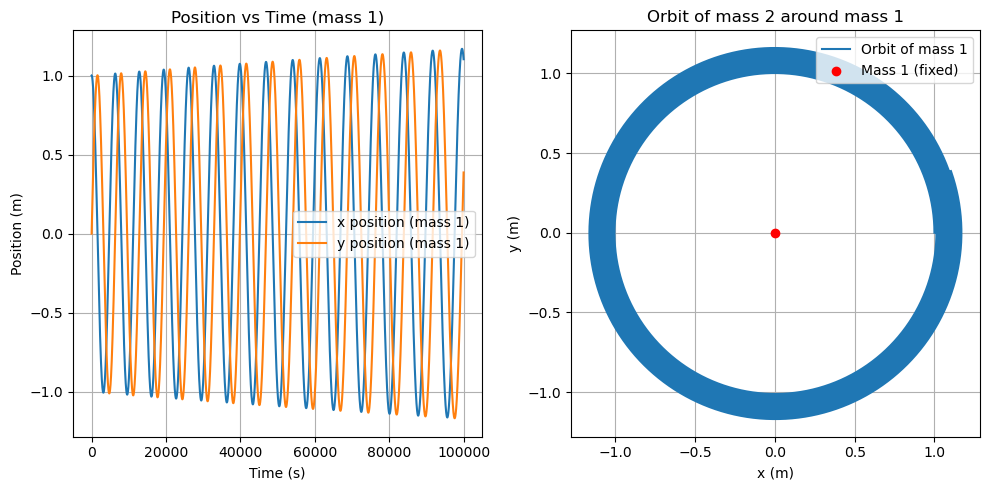

In [5]:
# Plot orbit 

# Create time array
t = np.linspace(0, dt*Nsteps, Nsteps+1)

plt.figure(figsize=(10,5))

# Plot for small mass
plt.subplot(121)
plt.plot(r1[:,0], label='x position (mass 1)')
plt.plot(r1[:,1], label='y position (mass 1)')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Position vs Time (mass 1)')
plt.legend()
plt.grid(True)

# Plot orbit for mass 2 around mass 1
plt.subplot(122)
plt.plot(r1[:,0], r1[:,1], label='Orbit of mass 1')  # Plot orbit of mass 1

# Plot mass 1's position
plt.scatter(0, 0, color='red', label='Mass 1 (fixed)', zorder=5)  # Mass 1 at the center

plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Orbit of mass 2 around mass 1')
plt.axis('equal')
plt.grid(True)

plt.legend(loc='upper right')

plt.tight_layout()


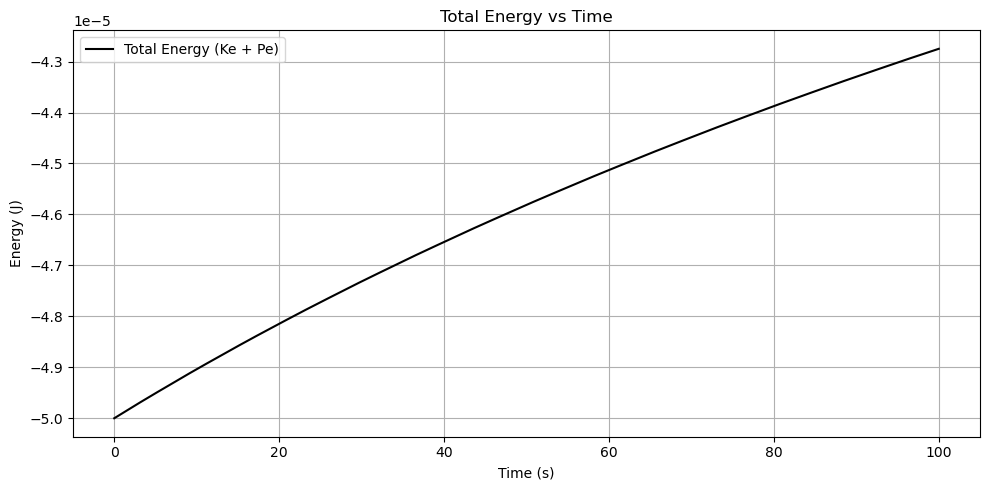

In [6]:
# Plotting total energy vs time
plt.figure(figsize=(10, 5))
plt.plot(time, Ke + Pe, label='Total Energy (Ke + Pe)', linestyle='-', color='black')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Total Energy vs Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


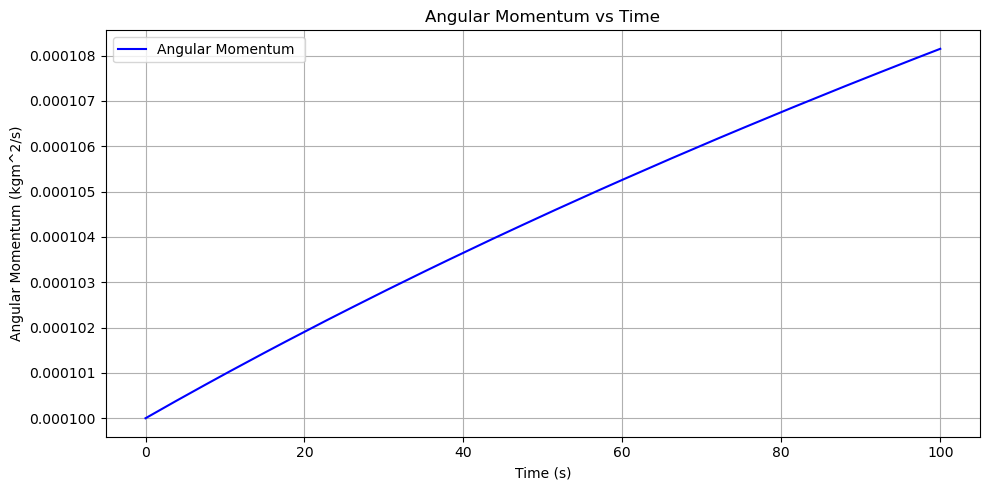

In [7]:
# Plotting Angular Momentum vs Time
plt.figure(figsize=(10, 5))
plt.plot(time, L, label="Angular Momentum ", color="b")
plt.xlabel('Time (s)')
plt.ylabel('Angular Momentum (kgm^2/s)')
plt.title('Angular Momentum vs Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### Reliability of Euler's Method  
Euler's method, while simple, introduces errors that accumulate over time, making it unreliable for long-term simulations of conserved systems such as orbital mechanics. It often fails to conserve total energy and angular momentum, resulting in unphysical behaviors such as spiraling orbits.

#### Effect of Timestep (Δt)  
- **Small Δt:** Improves accuracy and reduces truncation errors but increases computational cost.  
- **Large Δt:** Leads to significant errors and potential instability, particularly in oscillatory systems like orbits.

We'll now consider a more reliable method: the **velocity Verlet method**, which provides more stable simulations.



## More Reliable: Velocity Verlet

The **velocity Verlet method** improves upon Euler's method by better conserving total energy and angular momentum in systems where such conservation laws are crucial, such as orbital mechanics. Unlike Euler, it provides second-order accuracy and significantly reduces truncation errors, making it more suitable for long-term simulations.

To make the problem more realistic, the orbit must be centered around the **center of mass** of the two bodies, rather than assuming one body remains fixed. Additionally, the two masses are chosen to be closer in magnitude compared to the previous section, which introduces more realistic dynamics.

### Initial Conditions

To calculate the initial positions and velocities:

1. **Center of Mass (CoM):**  
   The center of mass is calculated as:
   $$
   \vec{R}_{\text{CoM}} = \frac{m_1 \vec{r}_1 + m_2 \vec{r}_2}{m_1 + m_2}
  $$
   Positions are adjusted such that the center of mass remains stationary.

2. **Velocities for Circular Orbit:**  
   Assuming the system starts with a circular orbit, the velocity of each body is determined using the condition:
  $$
   v = \sqrt{\frac{G (m_1 + m_2)}{r}}
 $$
   Here, \(r\) is the initial separation between the two masses. The velocities are assigned perpendicular to the line joining the masses to ensure circular motion.

These steps ensure the system's initial state satisfies the conditions for realistic orbital dynamics.


In [8]:
# Set up constants and variables
G = 1  # Gravitational constant 
m1_new = 0.1 
m2_new = 1.0  
M = m1_new + m2_new  # Total mass
r12 = 1.0  # Distance between the two masses
dt_new = 0.01  # Time step
Nsteps_new = 1000  # Number of steps
Ndim = 2  # Number of spatial dimensions
t_new = np.linspace(0,Nsteps_new*dt_new,Nsteps_new)


# Initialise position and velocity 
r1 = np.zeros((Nsteps_new, Ndim))
r2 = np.zeros((Nsteps_new, Ndim))
v1 = np.zeros((Nsteps_new, Ndim))
v2 = np.zeros((Nsteps_new, Ndim))

# Store energy 
Ke = np.zeros(Nsteps_new)  # Total kinetic energy
Pe = np.zeros(Nsteps_new)  # Potential energy

# Initial conditions
r1_new = np.array([m2_new * r12 / (m1_new + m2_new), 0.0])
r2_new = np.array([m1_new * r12 / (m1_new + m2_new), 0.0])
r1[0],r2[0] = r1_new, - r2_new

v1_new = np.array([0.0, np.sqrt(G * m2_new * np.abs(r1_new[0]) / r12**2)])
v2_new = np.array([0.0, np.sqrt(G * m1_new * np.abs(r2_new[0]) / r12**2)])
v1[0], v2[0] = v1_new, -v2_new  

### Orbit, Energies, and Angular Momentum

1. **Orbit Plot:** The orbit of the two bodies is determined by their positions $ \mathbf{r_1}(t) $ and $ \mathbf{r_2}(t) $ over time. The positions are updated using the Velocity Verlet method in the following way:

$$
\mathbf{r_1}(t + \Delta t) = \mathbf{r_1}(t) + \Delta t \cdot \mathbf{v_1}(t) + \frac{\Delta t^2}{2m_1} \mathbf{F_1}(t)
$$

$$
\mathbf{r_2}(t + \Delta t) = \mathbf{r_2}(t) + \Delta t \cdot \mathbf{v_2}(t) + \frac{\Delta t^2}{2m_2} \mathbf{F_2}(t)
$$

Where $ \mathbf{F_1}(t) $ and $ \mathbf{F_2}(t) $ are the forces acting on the two bodies due to their gravitational interaction. The positions of both bodies at each time step are updated, and these are used to compute the velocities and the energy of the system.

2. **Energy Plot:** The total energy of the system is the sum of the kinetic and potential energies:

- **Kinetic Energy:**
$$
K_{\text{e}} = \frac{1}{2} m_1 v_1^2 + \frac{1}{2} m_2 v_2^2
$$

- **Potential Energy:**
$$
P_{\text{e}} = - \frac{G m_1 m_2}{|\mathbf{r_1}(t) - \mathbf{r_2}(t)|}
$$

The total energy is the sum of these two quantities:

$$
E_{\text{total}} = K_{\text{e}} + P_{\text{e}}
$$

3. **Angular Momentum Plot:** The angular momentum for each body is calculated using the cross-product of position and velocity vectors. For 2D motion, the angular momentum is given by:

$$
L = m_1 \left( \mathbf{r_1}(t) \times \mathbf{v_1}(t) \right) + m_2 \left( \mathbf{r_2}(t) \times \mathbf{v_2}(t) \right)
$$

Since the system is in 2D, the cross-product simplifies to:

$$
L = m_1  r_{1x} v_{1y} - r_{1y} v_{1x} 
$$


In [9]:
for i in range(Nsteps_new - 1):
    # Compute forces at current position
    F1 = force(r1[i], r2[i], m1_new, m2_new)
    F2 = -F1

    # Update positions 
    r1[i + 1] = r1[i] + dt_new * v1[i] + 0.5 * dt_new**2 * (F1 / m1_new)
    r2[i + 1] = r2[i] + dt_new * v2[i] + 0.5 * dt_new**2 * (F2 / m2_new)

    # Compute forces at new position
    F1_new = force(r1[i + 1], r2[i + 1], m1_new, m2_new)
    F2_new = -F1_new

    # Update velocities 
    v1[i + 1] = v1[i] + 0.5 * dt_new * (F1 / m1_new + F1_new / m1_new)
    v2[i + 1] = v2[i] + 0.5 * dt_new * (F2 / m2_new + F2_new / m2_new)

    # Compute energies 
    Ke[i] = 0.5 * m1_new * np.dot(v1[i], v1[i]) + 0.5 * m2_new * np.dot(v2[i], v2[i])
    r_mag = np.linalg.norm(r2[i] - r1[i])
    if r_mag < 1e-10:
        Pe[i] = 0
    else:
        Pe[i] = -G * m1_new * m2_new / r_mag

# Final energy at the last step
Ke[-1] = 0.5 * m1_new * np.dot(v1[-1], v1[-1]) + 0.5 * m2_new * np.dot(v2[-1], v2[-1])
Pe[-1] = -G * m1_new * m2_new / (np.linalg.norm(r2[-1] - r1[-1])) 


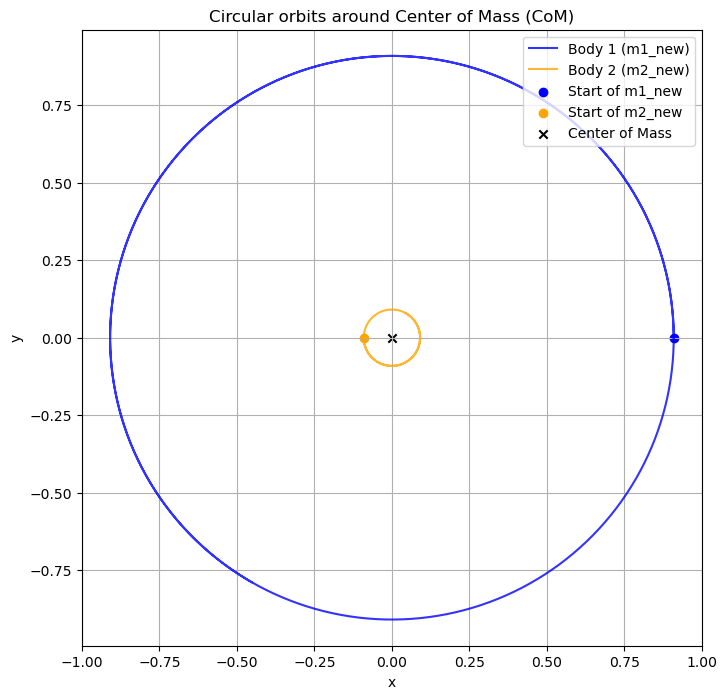

In [10]:
# Plot the orbits
plt.figure(figsize=(8, 8))
plt.plot(r1[:, 0], r1[:, 1], label="Body 1 (m1_new)", color="blue", alpha=0.8)
plt.plot(r2[:, 0], r2[:, 1], label="Body 2 (m2_new)", color="orange", alpha=0.8)
plt.scatter([r1[0, 0]], [r1[0, 1]], color='blue', marker='o', label='Start of m1_new')
plt.scatter([r2[0, 0]], [r2[0, 1]], color='orange', marker='o', label='Start of m2_new')
plt.scatter([0], [0], color='k', marker='x', label='Center of Mass')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Circular orbits around Center of Mass (CoM)')
plt.legend(loc='upper right')
plt.grid()
plt.axis('equal')
plt.show()


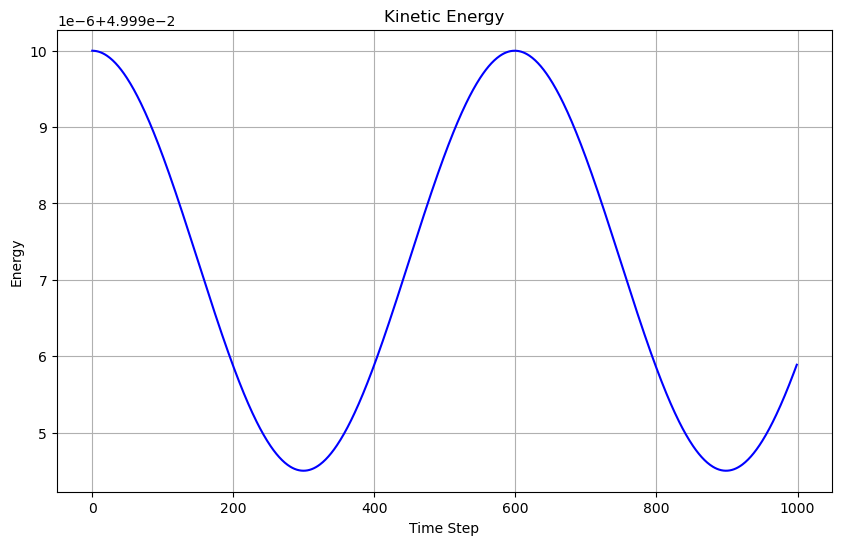

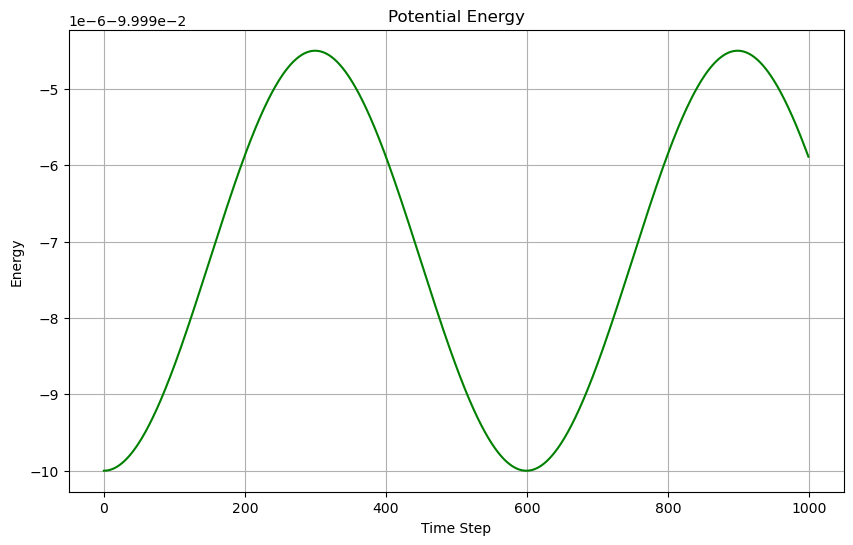

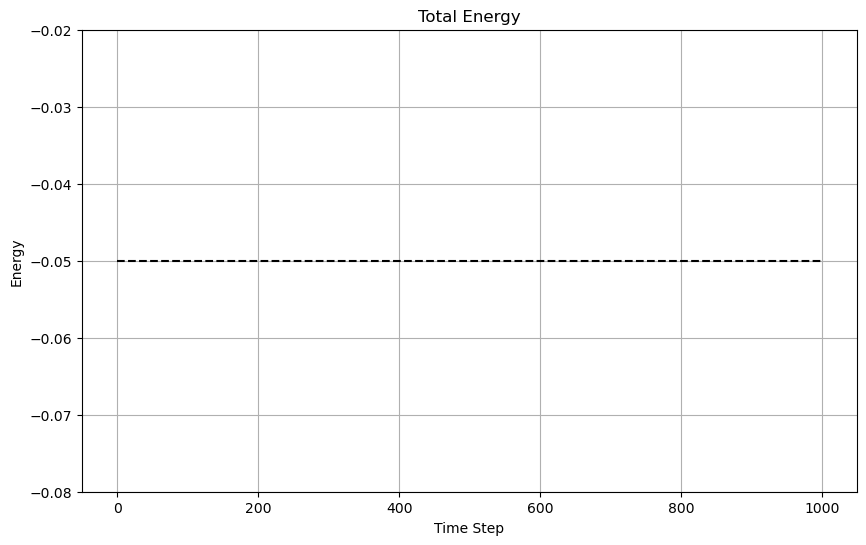

In [11]:
# Plotting kinetic energy 
plt.figure(figsize=(10, 6))
plt.plot(Ke, label="Kinetic Energy", color='blue')
plt.title("Kinetic Energy")
plt.xlabel("Time Step")
plt.ylabel("Energy")
plt.grid(True)
plt.show()

# Plotting potential energy 
plt.figure(figsize=(10, 6))
plt.plot(Pe, label="Potential Energy", color='green')
plt.title("Potential Energy")
plt.xlabel("Time Step")
plt.ylabel("Energy")
plt.grid(True)
plt.show()

# Plotting total energy 
plt.figure(figsize=(10, 6))
plt.plot(Ke + Pe, label="Total Energy", color='black', linestyle='--')
plt.title("Total Energy")
plt.xlabel("Time Step")
plt.ylabel("Energy")
plt.grid(True)
plt.ylim(-0.08, -0.02)

plt.show()


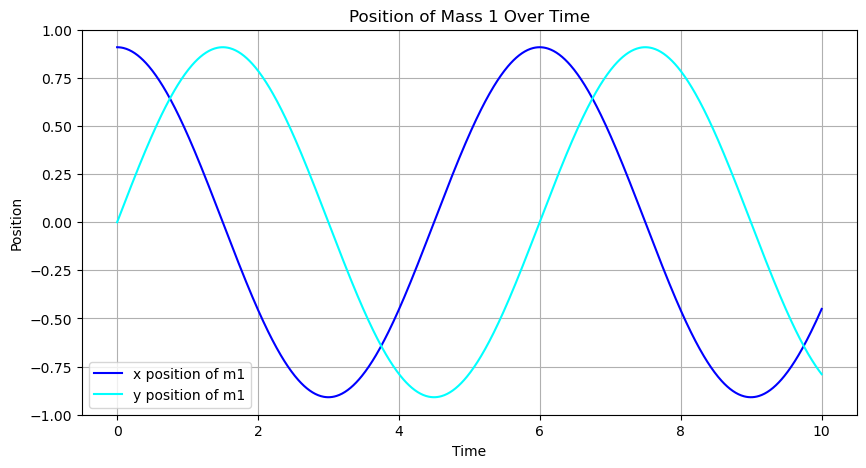

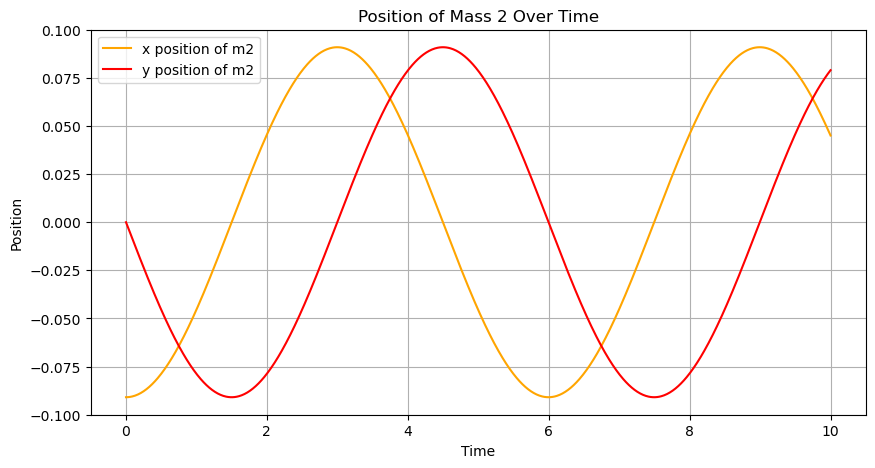

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(t_new, r1[:, 0], label="x position of m1", color='blue')
plt.plot(t_new, r1[:, 1], label="y position of m1", color='cyan')
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.title("Position of Mass 1 Over Time")
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t_new, r2[:, 0], label="x position of m2", color='orange')
plt.plot(t_new, r2[:, 1], label="y position of m2", color='red')
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.title("Position of Mass 2 Over Time")
plt.grid()
plt.show()


# Angular Momentum plots

In [13]:
# Computing angular momenta for each mass 
L1 = r1[:, 0] * (m1_new * v1[:, 1]) - r1[:, 1] * (m1_new * v1[:, 0])  # for m1
L2 = r2[:, 0] * (m2_new * v2[:, 1]) - r2[:, 1] * (m2_new * v2[:, 0])  # for m2

# Total angular momentum
L_total = L1 + L2

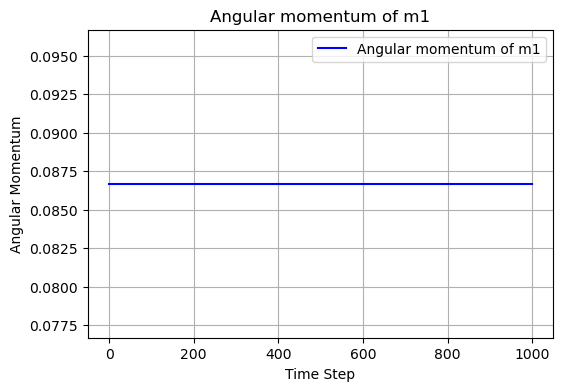

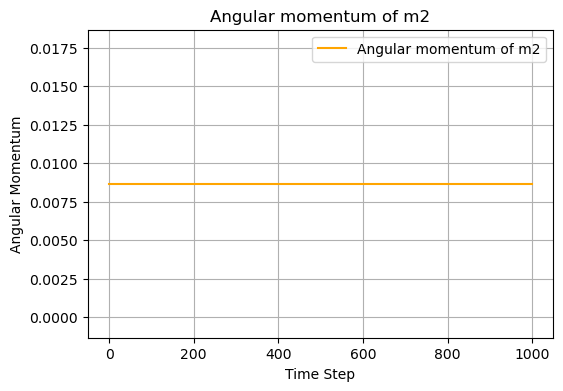

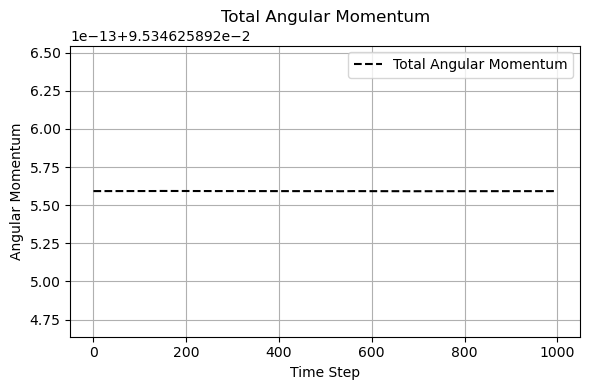

In [14]:
# Plot angular momentum of m1
plt.figure(figsize=(6, 4))  # Smaller figure size
plt.plot(L1, label="Angular momentum of m1", color='blue')
plt.title("Angular momentum of m1")
plt.xlabel("Time Step")
plt.ylabel("Angular Momentum")
plt.ylim(np.min(L1) - 0.01, np.max(L1) + 0.01)  # adjust y-limits
plt.grid(True)
plt.legend()


# Plot angular momentum of m2
plt.figure(figsize=(6, 4))  # Smaller figure size
plt.plot(L2, label="Angular momentum of m2", color='orange')
plt.title("Angular momentum of m2")
plt.xlabel("Time Step")
plt.ylabel("Angular Momentum")
plt.ylim(np.min(L2) - 0.01, np.max(L2) + 0.01)  # adjust y-limits
plt.grid(True)
plt.legend()


# Plot total angular momentum
plt.figure(figsize=(6, 4))  
plt.plot(L_total, label="Total Angular Momentum", color='black', linestyle='--')
plt.title("Total Angular Momentum")
plt.xlabel("Time Step")
plt.ylabel("Angular Momentum")
plt.grid(True)
plt.legend()


plt.tight_layout()  
plt.show()


# Experimenting with different dt (dt = 10.0, 1.0, 0.1)

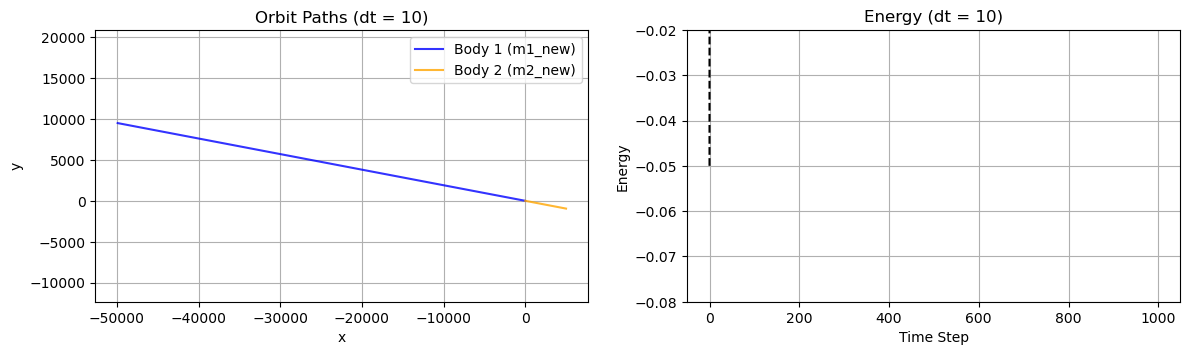

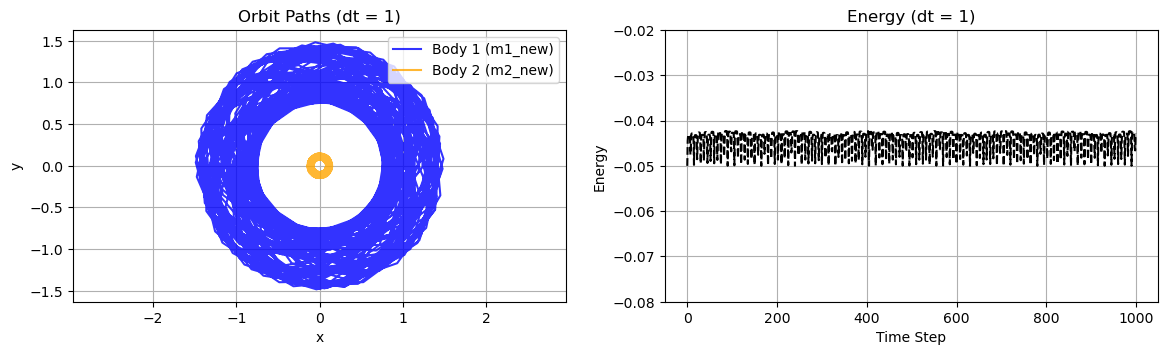

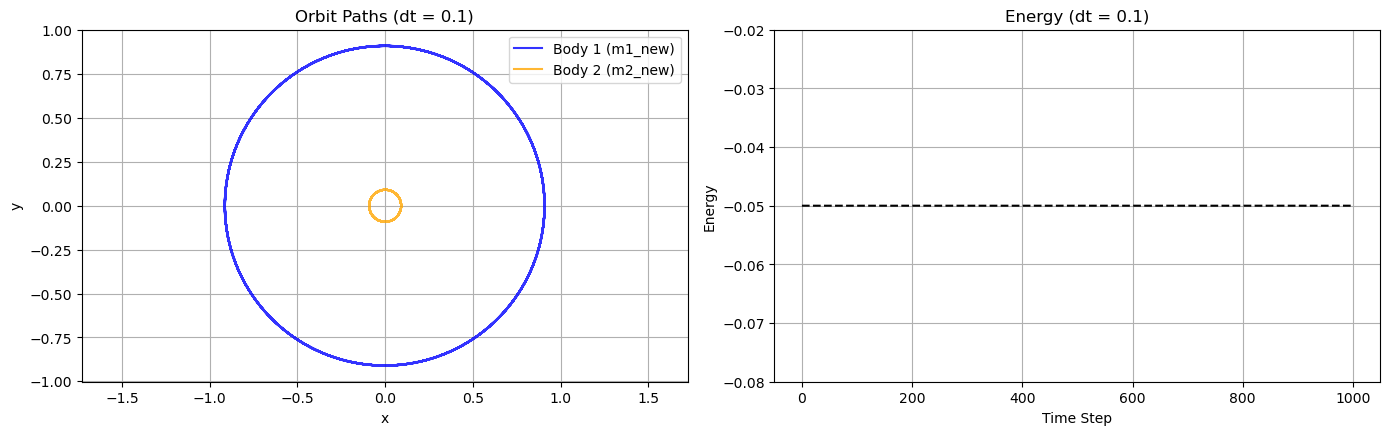

In [15]:
# Set up different time step values for dt
dt_values = [10, 1, 0.1]
labels = ['dt = 10', 'dt = 1', 'dt = 0.1']

# Loop over the different dt values
for idx, dt_new in enumerate(dt_values):

    # Velocity Verlet
    for i in range(Nsteps_new - 1):
        # Compute forces 
        F1 = force(r1[i], r2[i], m1_new, m2_new)
        F2 = -F1

        # Update positions 
        r1[i + 1] = r1[i] + dt_new * v1[i] + 0.5 * dt_new**2 * (F1 / m1_new)
        r2[i + 1] = r2[i] + dt_new * v2[i] + 0.5 * dt_new**2 * (F2 / m2_new)

        # Compute forces at new position
        F1_new = force(r1[i + 1], r2[i + 1], m1_new, m2_new)
        F2_new = -F1_new

        # Update velocities 
        v1[i + 1] = v1[i] + 0.5 * dt_new * (F1 / m1_new + F1_new / m1_new)
        v2[i + 1] = v2[i] + 0.5 * dt_new * (F2 / m2_new + F2_new / m2_new)

        # Compute energies 
        Ke[i] = 0.5 * m1_new * np.dot(v1[i], v1[i]) + 0.5 * m2_new * np.dot(v2[i], v2[i])
        r_mag = np.linalg.norm(r2[i] - r1[i])
        if r_mag < 1e-10:
            Pe[i] = 0
        else:
            Pe[i] = -G * m1_new * m2_new / r_mag

    # Final energy at the last step
    Ke[-1] = 0.5 * m1_new * np.dot(v1[-1], v1[-1]) + 0.5 * m2_new * np.dot(v2[-1], v2[-1])
    Pe[-1] = -G * m1_new * m2_new / (np.linalg.norm(r2[-1] - r1[-1])) 

    # Plot the positions and energies for each dt value
    plt.figure(figsize=(14, 12))

    plt.subplot(3, 2, 2*idx+1)  # First column, each dt
    plt.plot(r1[:, 0], r1[:, 1], label="Body 1 (m1_new)", color="blue", alpha=0.8)
    plt.plot(r2[:, 0], r2[:, 1], label="Body 2 (m2_new)", color="orange", alpha=0.8)
    plt.title(f"Orbit Paths ({labels[idx]})")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='upper right')
    plt.grid()
    plt.axis('equal')

    plt.subplot(3, 2, 2*idx+2)  # Second column, each dt
    plt.plot(Ke + Pe, label="Total Energy", color='black', linestyle='--')
    plt.title(f"Energy ({labels[idx]})")
    plt.xlabel("Time Step")
    plt.ylabel("Energy")
    plt.grid(True)
    plt.ylim(-0.08, -0.02)

# Adjust layout
plt.tight_layout()
plt.show()

### Conclusion

In this simulation, the Velocity Verlet method outperforms the Euler method in terms of energy and angular momentum conservation. The Velocity Verlet method maintains nearly constant total energy and angular momentum, ensuring stable orbits, while the Euler method exhibits significant fluctuations and instability, particularly for longer simulations.

Experimenting with different time steps (dt) in the velocity Verlet method, we find that larger values, like dt = 10.0, lead to erratic orbits and energy oscillations. Smaller time steps (dt = 0.01) provide the most stability, while dt = 0.1 shows stable orbits, though with less precision. dt = 1.0 exhibits somewhat stablising orbits but still displays chaotic behavior, especially in energy conservation.

In summary, the Velocity Verlet method is the more accurate and stable choice for long-term simulations, while Euler is only suitable for rough approximations, especially with small time steps. Reducing dt or increasing the number of time steps seems to improve accuracy, and  0.01 < dt < 0.1 is optimal for stability.

# Three body problem

In [16]:
# Constants
G = 1  # Gravitational constant
m1 = 1  # Mass of the star
m2 = 3e-6  # Mass of the planet
m3 = 3.6e-8  # Mass of the moon
r12 = 1  # Distance between m1 and m2
r23 = 0.0025  # Distance between m2 and m3
dt = 0.01  # Time step
Nsteps = 1000  # Number of simulation steps

# Initial Positions 
r1 = np.array([0.0, 0.0])  # Star at the origin
r2 = np.array([r12, 0.0])  # Planet at distance r12 along x-axis
r3 = np.array([r12 + r23, 0.0])  # Moon at distance r23 from m2


In [17]:
# Define the acceleration function
def acceleration(r1, r2, r3):
    """
    Compute gravitational accelerations of three bodies in a 3-body system.

    Parameters:
    -----------
    r1, r2, r3 :
        Position vectors of the three bodies (3D).

    Returns:
    --------
        Acceleration vectors (a1, a2, a3) for each body due to gravitational forces.
    """
    r12 = np.linalg.norm(r1 - r2)
    r13 = np.linalg.norm(r1 - r3)
    r23 = np.linalg.norm(r2 - r3)
    
    a1 = -G * (m2 * (r1 - r2) / r12**3 + m3 * (r1 - r3) / r13**3)
    a2 = -G * (m1 * (r2 - r1) / r12**3 + m3 * (r2 - r3) / r23**3)
    a3 = -G * (m1 * (r3 - r1) / r13**3 + m2 * (r3 - r2) / r23**3)

    return a1, a2, a3

In [18]:
# Approximate initial velocities
v1 = np.array([0.0, 0.0])  # Star is stationary
v2 = np.array([0.0, np.sqrt(G * m1 / r12)])  # Orbital velocity of m2 (planet) relative to m1
v3_relative = np.array([0.0, np.sqrt(G * m2 / r23)])  # Orbital velocity of m3 (moon) relative to m2
v3 = v3_relative + v2  # Absolute velocity of m3 (moon)

# Arrays to store positions, velocities, and energies for plotting
r1_positions = []
r2_positions = []
r3_positions = []
v1_velocities = []
v2_velocities = []
v3_velocities = []

In [19]:
# Time evolution loop using velocity Verlet integration
for step in range(Nsteps):
    # Calculate accelerations at current positions
    a1, a2, a3 = acceleration(r1, r2, r3)

    # Update positions 
    r1 += v1 * dt + 0.5 * a1 * dt**2
    r2 += v2 * dt + 0.5 * a2 * dt**2
    r3 += v3 * dt + 0.5 * a3 * dt**2

    # Calculate new accelerations 
    a1_new, a2_new, a3_new = acceleration(r1, r2, r3)

    # Update velocities )
    v1 += 0.5 * (a1 + a1_new) * dt
    v2 += 0.5 * (a2 + a2_new) * dt
    v3 += 0.5 * (a3 + a3_new) * dt

    # Store positions and velocities 
    r1_positions.append(r1.copy())
    r2_positions.append(r2.copy())
    r3_positions.append(r3.copy())
    v1_velocities.append(v1.copy())
    v2_velocities.append(v2.copy())
    v3_velocities.append(v3.copy())
    
    # Convert lists to numpy arrays 
r1_positions = np.array(r1_positions)
r2_positions = np.array(r2_positions)
r3_positions = np.array(r3_positions)
v1_velocities = np.array(v1_velocities)
v2_velocities = np.array(v2_velocities)
v3_velocities = np.array(v3_velocities)

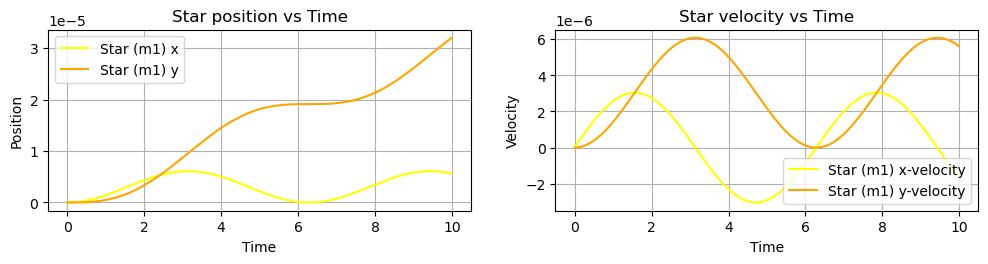

In [20]:
plt.figure(figsize=(12, 8))
# Star position
plt.subplot(3, 2, 1)
plt.plot(np.arange(Nsteps) * dt, r1_positions[:, 0], label="Star (m1) x", color='yellow')
plt.plot(np.arange(Nsteps) * dt, r1_positions[:, 1], label="Star (m1) y", color='orange')
plt.title("Star position vs Time")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.grid(True)


# Star velocity
plt.subplot(3, 2, 2)
plt.plot(np.arange(Nsteps) * dt, v1_velocities[:, 0], label="Star (m1) x-velocity", color='yellow')
plt.plot(np.arange(Nsteps) * dt, v1_velocities[:, 1], label="Star (m1) y-velocity", color='orange')
plt.title("Star velocity vs Time")
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.legend()
plt.grid(True)


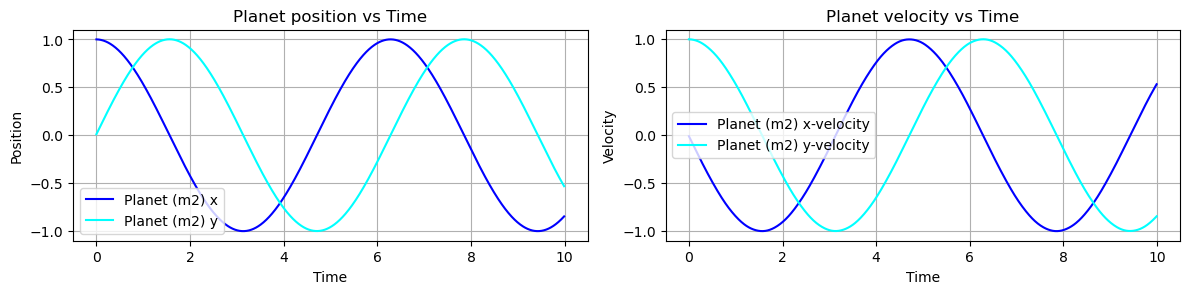

In [21]:
plt.figure(figsize=(12, 8))

# Planet position
plt.subplot(3, 2, 1)
plt.plot(np.arange(Nsteps) * dt, r2_positions[:, 0], label="Planet (m2) x", color='blue')
plt.plot(np.arange(Nsteps) * dt, r2_positions[:, 1], label="Planet (m2) y", color='cyan')
plt.title("Planet position vs Time")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.grid(True)

# Planet velocity
plt.subplot(3, 2, 2)
plt.plot(np.arange(Nsteps) * dt, v2_velocities[:, 0], label="Planet (m2) x-velocity", color='blue')
plt.plot(np.arange(Nsteps) * dt, v2_velocities[:, 1], label="Planet (m2) y-velocity", color='cyan')
plt.title("Planet velocity vs Time")
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

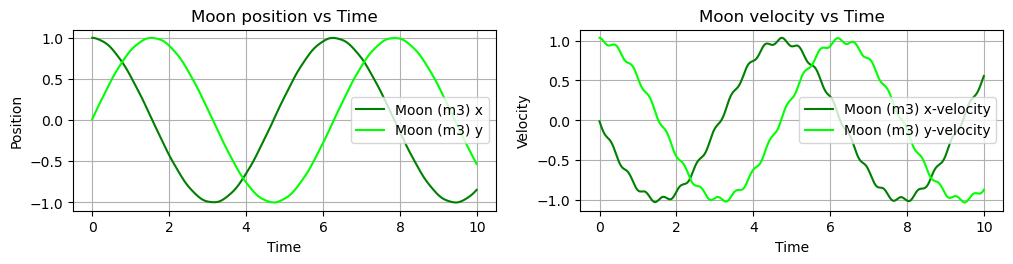

In [22]:
plt.figure(figsize=(12, 8))
# Moon position
plt.subplot(3, 2, 1)
plt.plot(np.arange(Nsteps) * dt, r3_positions[:, 0], label="Moon (m3) x", color='green')
plt.plot(np.arange(Nsteps) * dt, r3_positions[:, 1], label="Moon (m3) y", color='lime')
plt.title("Moon position vs Time")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.grid(True)

# Moon velocity
plt.subplot(3, 2, 2)
plt.plot(np.arange(Nsteps) * dt, v3_velocities[:, 0], label="Moon (m3) x-velocity", color='green')
plt.plot(np.arange(Nsteps) * dt, v3_velocities[:, 1], label="Moon (m3) y-velocity", color='lime')
plt.title("Moon velocity vs Time")
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.legend()
plt.grid(True)

plt.show()

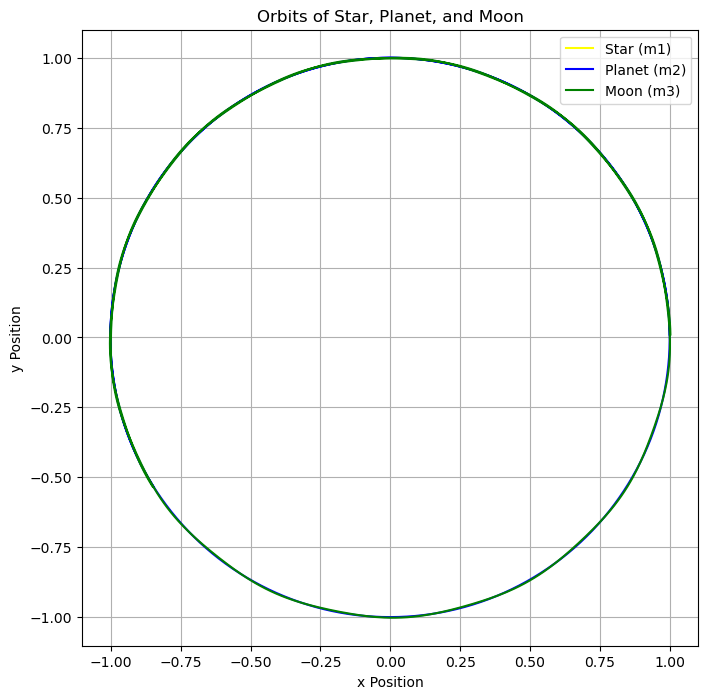

In [23]:
# Plotting the orbits of all masses
plt.figure(figsize=(8, 8))

# Star orbit
plt.plot(r1_positions[:, 0], r1_positions[:, 1], label="Star (m1)", color='yellow')

# Planet orbit
plt.plot(r2_positions[:, 0], r2_positions[:, 1], label="Planet (m2)", color='blue')

# Moon orbit
plt.plot(r3_positions[:, 0], r3_positions[:, 1], label="Moon (m3)", color='green')

plt.title("Orbits of Star, Planet, and Moon")
plt.xlabel("x Position")
plt.ylabel("y Position")
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


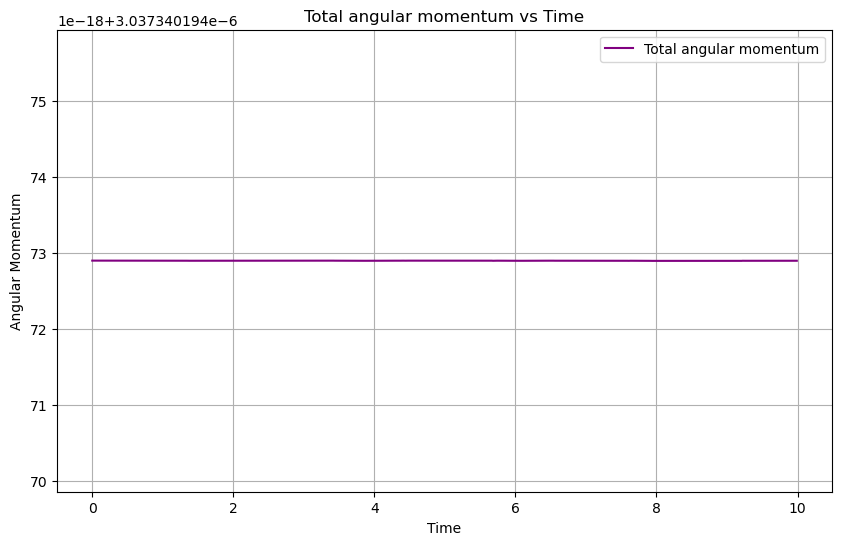

In [24]:
def angular_momentum(r, v, m):
    """
    Computing the angular momentum of a particle.

    Parameters:
    -----------
    r : Position vector of the particle (3D).
    v :Velocity vector of the particle (3D).
    m :Mass of the particle.

    Returns:
    --------
        Angular momentum vector (3D).
    """
    return np.cross(r, m * v)

angular_momentum_total = []

for step in range(Nsteps):
    L1 = angular_momentum(r1_positions[step], v1_velocities[step], m1)
    L2 = angular_momentum(r2_positions[step], v2_velocities[step], m2)
    L3 = angular_momentum(r3_positions[step], v3_velocities[step], m3)
    
    total_L = L1 + L2 + L3
    angular_momentum_total.append(np.linalg.norm(total_L))  # Store the magnitude of the total angular momentum

angular_momentum_total = np.array(angular_momentum_total)

# Plotting the angular momentum over time
plt.figure(figsize=(10, 6))
plt.plot(np.arange(Nsteps) * dt, angular_momentum_total, label="Total angular momentum", color='purple')
plt.title("Total angular momentum vs Time")
plt.xlabel("Time")
plt.ylabel("Angular Momentum")
plt.legend()
plt.grid(True)
plt.show()


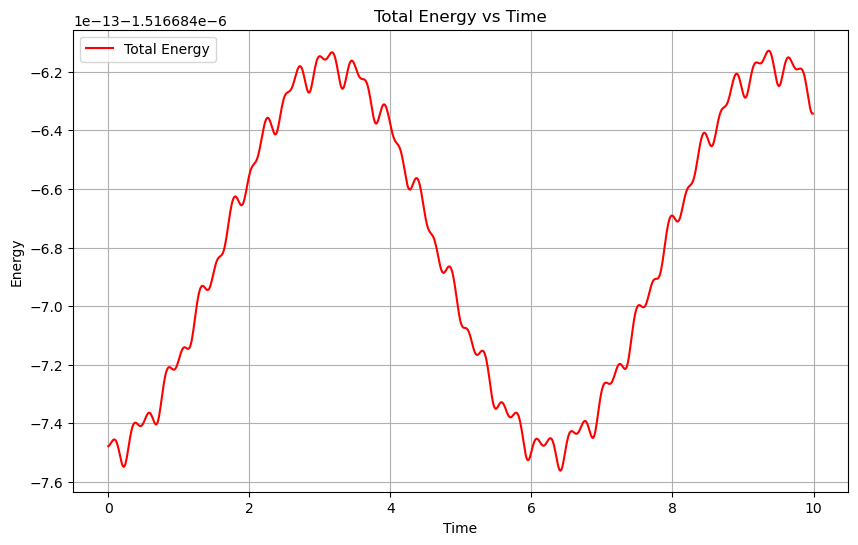

In [25]:
def total_energy(r1, r2, r3, v1, v2, v3):
    """
    Computing the total energy (kinetic + potential) of a 3-body system.

    Parameters:
    -----------
    r1, r2, r3 : Position vectors of the three bodies (3D).
    v1, v2, v3 : Velocity vectors of the three bodies (3D).

    Returns:
    --------
        Total energy of the system (kinetic + potential).
    """
    KE1 = 0.5 * m1 * np.dot(v1, v1)
    KE2 = 0.5 * m2 * np.dot(v2, v2)
    KE3 = 0.5 * m3 * np.dot(v3, v3)
    
    r12 = np.linalg.norm(r1 - r2)
    r13 = np.linalg.norm(r1 - r3)
    r23 = np.linalg.norm(r2 - r3)
    
    PE12 = -G * m1 * m2 / r12
    PE13 = -G * m1 * m3 / r13
    PE23 = -G * m2 * m3 / r23
    
    total_PE = PE12 + PE13 + PE23
    total_KE = KE1 + KE2 + KE3
    total_energy = total_KE + total_PE
    
    return total_energy

total_energy_values = []

for step in range(Nsteps):
    energy = total_energy(r1_positions[step], r2_positions[step], r3_positions[step], 
                          v1_velocities[step], v2_velocities[step], v3_velocities[step])
    total_energy_values.append(energy)

total_energy_values = np.array(total_energy_values)

# Plotting the total energy over time
plt.figure(figsize=(10, 6))
plt.plot(np.arange(Nsteps) * dt, total_energy_values, label="Total Energy", color='red')
plt.title("Total Energy vs Time")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.legend()
plt.grid(True)
plt.show()


# RUNGE-KUTTA METHOD

In [26]:
# Constants
Ndim = 2     
Nsteps = 10000
dt = 0.01    
G = 1        # Gravitational constant
m1 = 0.1     # Mass 1
m2 = 1.0     # Mass 2
r2 = 1.0     # Initial separation between the bodies

# Compute initial positions relative to the center of mass
r1_initial = np.array([-m2 / (m1 + m2) * r2, 0.0])  # m1's position
r2_initial = np.array([m1 / (m1 + m2) * r2, 0.0])   # m2's position

# Compute initial velocities for circular motion
v1_initial = np.array([0.0,  np.sqrt(G * (m1 + m2) / r2) * (m2 / (m1 + m2))])
v2_initial = np.array([0.0, -np.sqrt(G * (m1 + m2) / r2) * (m1 / (m1 + m2))])

# Arrays to store positions and velocities
r1 = np.zeros((Nsteps+1, Ndim))
r2 = np.zeros((Nsteps+1, Ndim))
v1 = np.zeros((Nsteps+1, Ndim))
v2 = np.zeros((Nsteps+1, Ndim))

L1 = np.zeros(Nsteps+1) 
L2 = np.zeros(Nsteps+1) 

Ke1 = np.zeros(Nsteps+1)  # Kinetic energy
Pe1 = np.zeros(Nsteps+1)  # Potential energy
Ke2 = np.zeros(Nsteps+1)  # Kinetic energy
Pe2 = np.zeros(Nsteps+1)  # Potential energy

# Initialise positions and velocities
r1[0] = r1_initial
r2[0] = r2_initial
v1[0] = v1_initial
v2[0] = v2_initial

In [27]:
# Velocity Verlet integration loop using RK4
for i in range(Nsteps):
    # Compute forces 
    f1 = force(r1[i], r2[i], m1, m2)
    f2 = -f1  # Newton's third law
    
    # Step 1: Calculate k1 for velocity and position
    k1_r1 = dt * v1[i]
    k1_r2 = dt * v2[i]
    k1_v1 = dt * f1 / m1
    k1_v2 = dt * f2 / m2

    # Step 2: Calculate k2 for velocity and position 
    r1_half = r1[i] + 0.5 * k1_r1
    r2_half = r2[i] + 0.5 * k1_r2
    v1_half = v1[i] + 0.5 * k1_v1
    v2_half = v2[i] + 0.5 * k1_v2
    f1_half = force(r1_half, r2_half, m1, m2)
    f2_half = -f1_half  
    
    k2_r1 = dt * v1_half
    k2_r2 = dt * v2_half
    k2_v1 = dt * f1_half / m1
    k2_v2 = dt * f2_half / m2

    # Step 3: Calculate k3 for velocity and position 
    r1_half = r1[i] + 0.5 * k2_r1
    r2_half = r2[i] + 0.5 * k2_r2
    v1_half = v1[i] + 0.5 * k2_v1
    v2_half = v2[i] + 0.5 * k2_v2
    f1_half = force(r1_half, r2_half, m1, m2)
    f2_half = -f1_half 
    
    k3_r1 = dt * v1_half
    k3_r2 = dt * v2_half
    k3_v1 = dt * f1_half / m1
    k3_v2 = dt * f2_half / m2

    # Step 4: Calculate k4 for velocity and position 
    r1_full = r1[i] + k3_r1
    r2_full = r2[i] + k3_r2
    v1_full = v1[i] + k3_v1
    v2_full = v2[i] + k3_v2
    f1_full = force(r1_full, r2_full, m1, m2)
    f2_full = -f1_full 
    
    k4_r1 = dt * v1_full
    k4_r2 = dt * v2_full
    k4_v1 = dt * f1_full / m1
    k4_v2 = dt * f2_full / m2
    
    # Update positions using RK4
    r1[i+1] = r1[i] + (1/6) * (k1_r1 + 2*k2_r1 + 2*k3_r1 + k4_r1)
    r2[i+1] = r2[i] + (1/6) * (k1_r2 + 2*k2_r2 + 2*k3_r2 + k4_r2)

    # Update velocities using RK4
    v1[i+1] = v1[i] + (1/6) * (k1_v1 + 2*k2_v1 + 2*k3_v1 + k4_v1)
    v2[i+1] = v2[i] + (1/6) * (k1_v2 + 2*k2_v2 + 2*k3_v2 + k4_v2)

    # Calculate energies
    Ke1[i+1] = 0.5 * m1 * np.linalg.norm(v1[i+1])**2
    Ke2[i+1] = 0.5 * m2 * np.linalg.norm(v2[i+1])**2

    # Calculate the potential energy between m1 and m2 
    r_dist = np.linalg.norm(r2[i] - r1[i])  # Distance between the two masses
    Pe1[i+1] = -G * m1 * m2 / r_dist
    Pe2[i+1] = -G * m1 * m2 / r_dist  # Same PE for both masses

    # Angular momentum
    L1[i+1] = m1 * (r1[i, 0] * v1[i, 1] - r1[i, 1] * v1[i, 0])
    L2[i+1] = m2 * (r2[i, 0] * v2[i, 1] - r2[i, 1] * v2[i, 0])

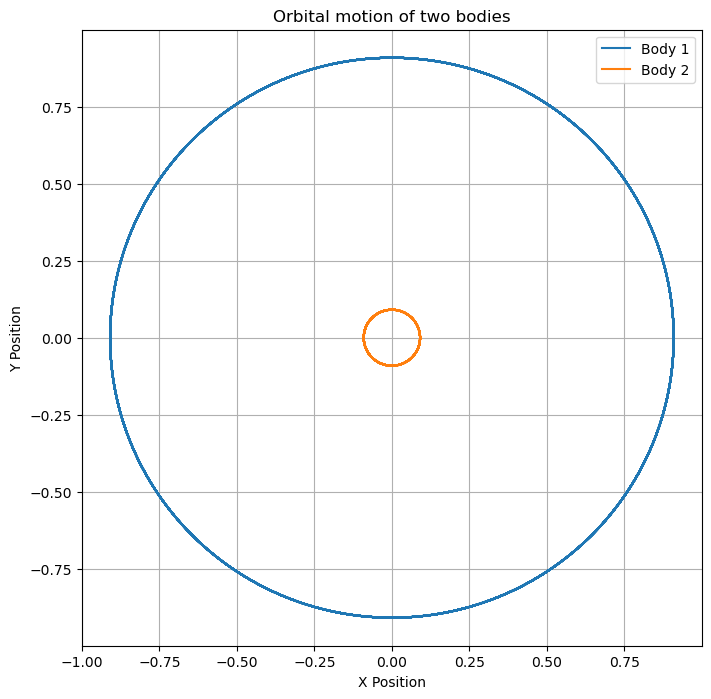

In [28]:
# Plot the results
plt.figure(figsize=(8, 8))
plt.plot(r1[:, 0], r1[:, 1], label="Body 1")
plt.plot(r2[:, 0], r2[:, 1], label="Body 2")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend()
plt.title("Orbital motion of two bodies")
plt.grid()
plt.show()

The **Runge-Kutta 4th Order (RK4)** method provides significantly higher accuracy and stability compared to both the **Euler** and **Velocity Verlet** methods. While **Euler** is the simplest and fastest, it suffers from low accuracy and poor stability over time. **Velocity Verlet** improves on Euler by offering better energy conservation and accuracy, making it suitable for many physical simulations, though it still lags behind RK4 in precision.

**RK4** stands out with its high accuracy, as it uses multiple force evaluations to better approximate the system's behavior. While it is computationally more expensive than both Euler and Velocity Verlet, its stability and precision make it ideal for simulations requiring long-term accuracy, such as planetary motion or sensitive systems. 

In summary, **RK4** is best for high-accuracy, stable simulations, while **Euler** and **Velocity Verlet** are faster but less accurate options suited to less demanding problems.

# Investigating Error

- **Euler Method**: The error is proportional to $ \Delta t $ (linear dependence). As the timestep decreases, the accuracy improves linearly, though not as rapidly as other methods.
- **Velocity Verlet**: The error is proportional to $ \Delta t^2 $ (quadratic dependence). This allows for faster improvement in accuracy compared to Euler, making it a more stable choice for smaller timesteps.
- **Runge-Kutta 4th Order (RK4)**: The error is proportional to $ \Delta t^4 $ (quartic dependence). This method provides the highest accuracy, especially for very small timesteps, but is computationally more expensive due to its higher complexity.

Earlier, we investigated how varying the timestep $ \Delta t $ affects the stability and accuracy of these methods. In this next section, we'll continue exploring the error relationships by looking more closely at how each method behaves as we adjust the timestep, comparing the theoretical error scaling with actual results from the code.


In [29]:
def analytical_solution(t, omega=1.0):
    """
    Compute the analytical solution for position in a harmonic oscillator.

    Parameters:
    -----------
    t : Time value(s) at which to evaluate the solution.
    omega : Angular frequency of the oscillator (default is 1.0).

    Returns:
    --------
        Position of the harmonic oscillator at time `t`.
    """
    return np.cos(omega * t)

def euler(dt, Nsteps):
    """
    Solve the harmonic oscillator using the Euler method.

    Parameters:
    -----------
    dt : Time step size.
    Nsteps :Number of time steps to simulate.

    Returns:
    --------
    Array of positions at each time step.
    """
    positions = np.zeros(Nsteps)
    velocities = np.zeros(Nsteps)
    
    positions[0] = 1.0
    velocities[0] = 0.0
    
    for i in range(1, Nsteps):
        positions[i] = positions[i-1] + velocities[i-1] * dt
        velocities[i] = velocities[i-1] - positions[i-1] * dt
        
    return positions

def velocity_verlet(dt, Nsteps):
    """
    Solve the harmonic oscillator using the Velocity Verlet method.

    Parameters:
    -----------
    dt :Time step size.
    Nsteps : Number of time steps to simulate.

    Returns:
    --------
    Array of positions at each time step.
    """
    positions = np.zeros(Nsteps)
    velocities = np.zeros(Nsteps)
    
    positions[0] = 1.0
    velocities[0] = 0.0
    
    for i in range(1, Nsteps):
        positions[i] = positions[i-1] + velocities[i-1] * dt + 0.5 * (-positions[i-1]) * dt**2
        velocities[i] = velocities[i-1] + 0.5 * (-positions[i-1] - positions[i]) * dt
        
    return positions

def rk4(dt, Nsteps):
    """
    Solve the harmonic oscillator using the 4th-order Runge-Kutta (RK4) method.

    Parameters:
    -----------
    dt :Time step size.
    Nsteps : Number of time steps to simulate.

    Returns:
    --------
    Array of positions at each time step.
    """
    positions = np.zeros(Nsteps)
    velocities = np.zeros(Nsteps)
    
    positions[0] = 1.0
    velocities[0] = 0.0
    
    for i in range(1, Nsteps):
        k1_v = -positions[i-1]
        k1_x = velocities[i-1]
        
        k2_v = -(positions[i-1] + 0.5 * dt * k1_x)
        k2_x = velocities[i-1] + 0.5 * dt * k1_v
        
        k3_v = -(positions[i-1] + 0.5 * dt * k2_x)
        k3_x = velocities[i-1] + 0.5 * dt * k2_v
        
        k4_v = -(positions[i-1] + dt * k3_x)
        k4_x = velocities[i-1] + dt * k3_v
        
        positions[i] = positions[i-1] + dt * (k1_x + 2*k2_x + 2*k3_x + k4_x) / 6
        velocities[i] = velocities[i-1] + dt * (k1_v + 2*k2_v + 2*k3_v + k4_v) / 6
        
    return positions

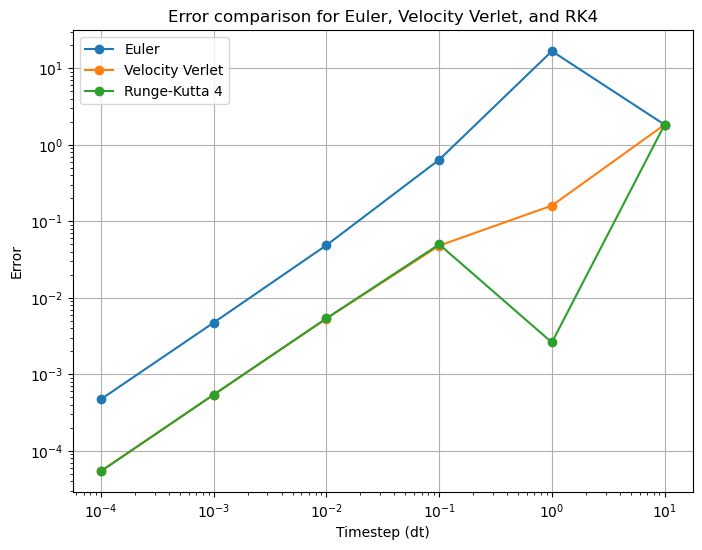

In [30]:
# Compare errors for different methods and dt
dt_values = [10, 1, 0.1, 0.01, 0.001, 0.0001]  # Different timesteps
exact_position = analytical_solution(np.array(dt_values) * 10)  

# Store errors
euler_errors = []
verlet_errors = []
rk4_errors = []

for dt in dt_values:
    Nsteps = int(10 / dt)  # Time span of 10 seconds
    
    # Compute positions using each method
    euler_pos = euler(dt, Nsteps)
    verlet_pos = velocity_verlet(dt, Nsteps)
    rk4_pos = rk4(dt, Nsteps)
    
    # Compute the error 
    exact_pos = analytical_solution(Nsteps * dt)
    euler_error = np.abs(exact_pos - euler_pos[-1])
    verlet_error = np.abs(exact_pos - verlet_pos[-1])
    rk4_error = np.abs(exact_pos - rk4_pos[-1])
    
    euler_errors.append(euler_error)
    verlet_errors.append(verlet_error)
    rk4_errors.append(rk4_error)

# Plot errors vs. dt
plt.figure(figsize=(8, 6))
plt.loglog(dt_values, euler_errors, label="Euler", marker='o')
plt.loglog(dt_values, verlet_errors, label="Velocity Verlet", marker='o')
plt.loglog(dt_values, rk4_errors, label="Runge-Kutta 4", marker='o')
plt.xlabel("Timestep (dt)")
plt.ylabel("Error")
plt.legend()
plt.title("Error comparison for Euler, Velocity Verlet, and RK4")
plt.grid(True)
plt.show()


**Observation:**

From the graph, we observe the following behavior:

- The *Euler Method* exhibits an error that increases linearly with $ \Delta t $, resulting in significantly higher errors for larger timesteps, particularly for $ \Delta t \geq 10^{-1} $. This is why its error is much higher than the other methods.
  
- Both the *Velocity Verlet* and *Runge-Kutta 4th Order (RK4)* methods show smaller errors, with the former scaling quadratically ($ \Delta t^2 $) and the latter quartically ($ \Delta t^4 $). For smaller timesteps, their errors are quite similar, indicating comparable accuracy.

- As the timestep increases to $ \Delta t \geq 10^{-1} $, all methods converge to similar error values. This occurs because the timestep becomes large enough to dominate the accuracy, causing all methods to lose precision and behave similarly.


# EXTENSION
## Stability of the Figure-Eight Choreography in a Three-Body System
In this extension, we simulate the motion of three bodies using the velocity Verlet method, analyse energy and angular momentum conservation, and test the system's stability by perturbing the initial conditions. This provides insights into the robustness of the figure-eight orbit and its sensitivity to changes.

In [31]:
# Define the total energy function
def calculate_total_energy(r1, r2, r3, v1, v2, v3, m1, m2, m3, G):
    """Calculate the total energy (kinetic + potential) of the system."""
    # Kinetic energy
    KE1 = 0.5 * m1 * np.linalg.norm(v1)**2
    KE2 = 0.5 * m2 * np.linalg.norm(v2)**2
    KE3 = 0.5 * m3 * np.linalg.norm(v3)**2
    total_KE = KE1 + KE2 + KE3

    # Potential energy
    r12 = np.linalg.norm(r1 - r2)
    r13 = np.linalg.norm(r1 - r3)
    r23 = np.linalg.norm(r2 - r3)
    
    PE12 = -G * m1 * m2 / r12
    PE13 = -G * m1 * m3 / r13
    PE23 = -G * m2 * m3 / r23
    total_PE = PE12 + PE13 + PE23

    # Total energy
    total_energy = total_KE + total_PE
    return total_energy


In [32]:
# Define the angular momentum function
def calculate_angular_momentum(r1, r2, r3, v1, v2, v3, m1, m2, m3):
    """Calculate the total angular momentum of the system."""
    # Angular momentum for each body
    L1 = m1 * (r1[0] * v1[1] - r1[1] * v1[0])  # Cross product for L_z
    L2 = m2 * (r2[0] * v2[1] - r2[1] * v2[0])
    L3 = m3 * (r3[0] * v3[1] - r3[1] * v3[0])

    # Total angular momentum
    total_L = L1 + L2 + L3
    return total_L

In [33]:
# Constants
G = 1.0  
m1 = 1.0  # Mass of body 1
m2 = 1.0  # Mass of body 2
m3 = 1.0  # Mass of body 3
dt = 0.01  
Nsteps = 10000  

# Initial positions 
r1 = np.array([-0.97000436, 0.24308753])
r2 = np.array([0.97000436, -0.24308753])
r3 = np.array([0.0, 0.0])

# Initial velocities 
v1 = np.array([0.466203685, 0.43236573])
v2 = np.array([0.466203685, 0.43236573])
v3 = np.array([-0.93240737, -0.86473146])

# Arrays to store positions and velocities
r1_positions = np.zeros((Nsteps, 2))
r2_positions = np.zeros((Nsteps, 2))
r3_positions = np.zeros((Nsteps, 2))
v1_velocities = np.zeros((Nsteps, 2))
v2_velocities = np.zeros((Nsteps, 2))
v3_velocities = np.zeros((Nsteps, 2))

# Store initial conditions
r1_positions[0] = r1
r2_positions[0] = r2
r3_positions[0] = r3
v1_velocities[0] = v1
v2_velocities[0] = v2
v3_velocities[0] = v3

# Arrays to store energy and angular momentum
total_energy = np.zeros(Nsteps)
angular_momentum = np.zeros(Nsteps)

In [34]:
# Velocity Verlet integration loop

for i in range(Nsteps - 1):
    # Calculate forces 
    F1 = force(r1_positions[i], r2_positions[i], m1, m2) + force(r1_positions[i], r3_positions[i], m1, m3)
    F2 = force(r2_positions[i], r1_positions[i], m2, m1) + force(r2_positions[i], r3_positions[i], m2, m3)
    F3 = force(r3_positions[i], r1_positions[i], m3, m1) + force(r3_positions[i], r2_positions[i], m3, m2)

    # Update positions
    r1_positions[i + 1] = r1_positions[i] + v1_velocities[i] * dt + 0.5 * F1 / m1 * dt**2
    r2_positions[i + 1] = r2_positions[i] + v2_velocities[i] * dt + 0.5 * F2 / m2 * dt**2
    r3_positions[i + 1] = r3_positions[i] + v3_velocities[i] * dt + 0.5 * F3 / m3 * dt**2

    # Calculate forces at new positions
    F1_new = force(r1_positions[i + 1], r2_positions[i + 1], m1, m2) + force(r1_positions[i + 1], r3_positions[i + 1], m1, m3)
    F2_new = force(r2_positions[i + 1], r1_positions[i + 1], m2, m1) + force(r2_positions[i + 1], r3_positions[i + 1], m2, m3)
    F3_new = force(r3_positions[i + 1], r1_positions[i + 1], m3, m1) + force(r3_positions[i + 1], r2_positions[i + 1], m3, m2)

    # Update velocities
    v1_velocities[i + 1] = v1_velocities[i] + 0.5 * (F1 + F1_new) / m1 * dt
    v2_velocities[i + 1] = v2_velocities[i] + 0.5 * (F2 + F2_new) / m2 * dt
    v3_velocities[i + 1] = v3_velocities[i] + 0.5 * (F3 + F3_new) / m3 * dt

    # Calculate total energy and angular momentum
    total_energy[i] = calculate_total_energy(r1_positions[i], r2_positions[i], r3_positions[i], v1_velocities[i], v2_velocities[i], v3_velocities[i], m1, m2, m3, G)
    angular_momentum[i] = calculate_angular_momentum(r1_positions[i], r2_positions[i], r3_positions[i], v1_velocities[i], v2_velocities[i], v3_velocities[i], m1, m2, m3)

# Final energy and angular momentum
total_energy[-1] = calculate_total_energy(r1_positions[-1], r2_positions[-1], r3_positions[-1], v1_velocities[-1], v2_velocities[-1], v3_velocities[-1], m1, m2, m3, G)
angular_momentum[-1] = calculate_angular_momentum(r1_positions[-1], r2_positions[-1], r3_positions[-1], v1_velocities[-1], v2_velocities[-1], v3_velocities[-1], m1, m2, m3)

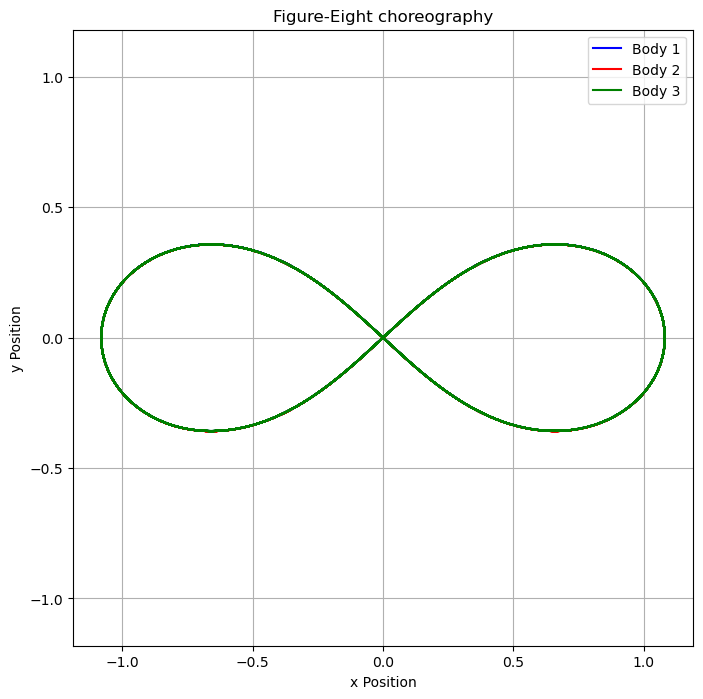

In [35]:
# Plotting the results
time = np.arange(Nsteps) * dt

# Plot trajectories
plt.figure(figsize=(8, 8))
plt.plot(r1_positions[:, 0], r1_positions[:, 1], label="Body 1", color="blue")
plt.plot(r2_positions[:, 0], r2_positions[:, 1], label="Body 2", color="red")
plt.plot(r3_positions[:, 0], r3_positions[:, 1], label="Body 3", color="green")
plt.title("Figure-Eight choreography")
plt.xlabel("x Position")
plt.ylabel("y Position")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()

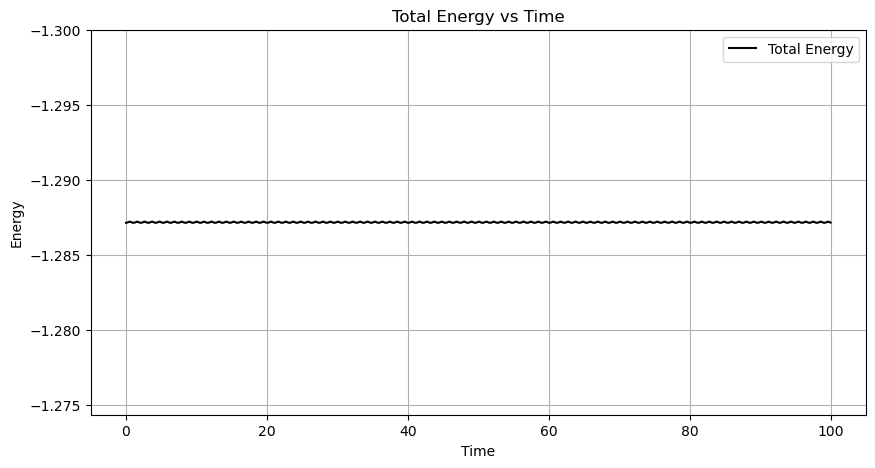

In [36]:
# Plot total energy vs time
plt.figure(figsize=(10, 5))
plt.plot(time, total_energy, label="Total Energy", color="black")
plt.title("Total Energy vs Time")
plt.xlabel("Time")
plt.ylabel("Energy")

# Adjust y-axis limits 
plt.ylim(min(total_energy) * 0.99, max(total_energy) * 1.01)  

plt.legend()
plt.grid(True)
plt.show()

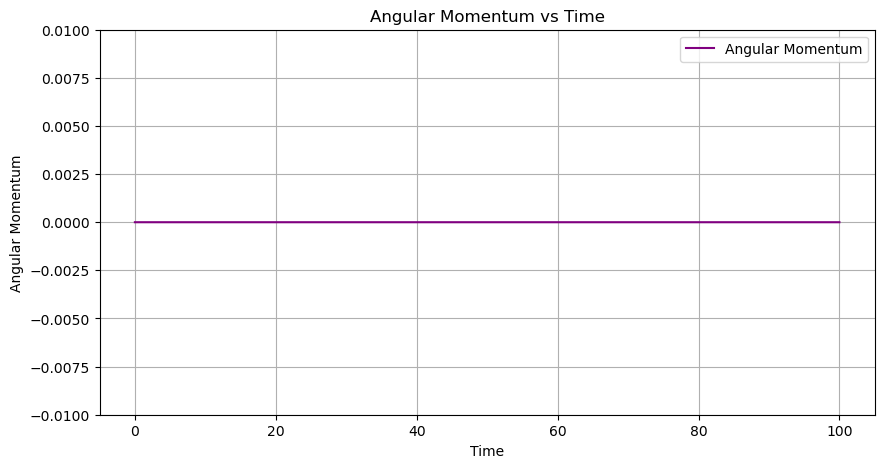

In [37]:
# Plot angular momentum vs time
plt.figure(figsize=(10, 5))
plt.plot(time, angular_momentum, label="Angular Momentum", color="purple")
plt.title("Angular Momentum vs Time")
plt.xlabel("Time")
plt.ylabel("Angular Momentum")
plt.legend()
plt.grid(True)

y_min = np.min(angular_momentum) - 0.01  
y_max = np.max(angular_momentum) + 0.01  
plt.ylim([y_min, y_max])
plt.show()

# Perturbation analysis

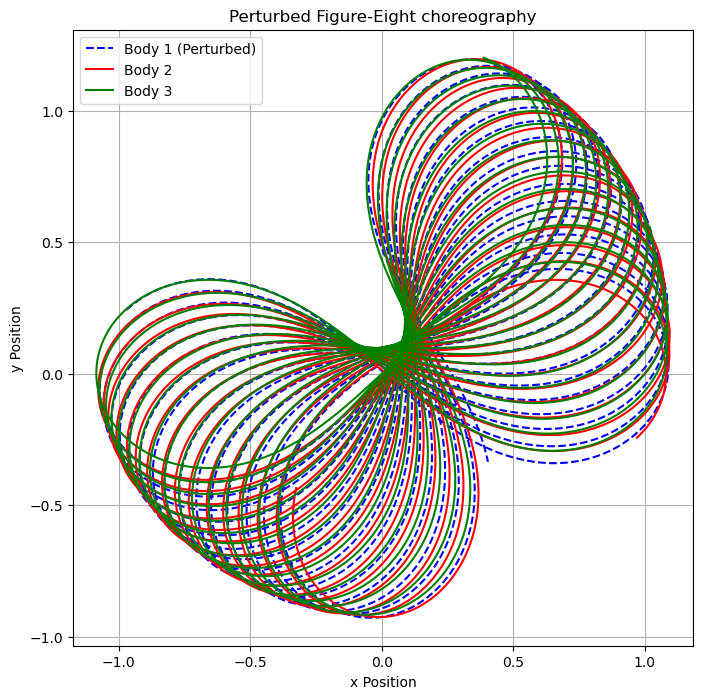

In [38]:
# Perturb the initial velocity of body 1 by 1%
v1_perturbed = v1 * 1.01

# Store perturbed initial conditions
v1_velocities[0] = v1_perturbed

# Run the simulation with perturbed initial conditions
for i in range(Nsteps - 1):
    F1 = force(r1_positions[i], r2_positions[i], m1, m2) + force(r1_positions[i], r3_positions[i], m1, m3)
    F2 = force(r2_positions[i], r1_positions[i], m2, m1) + force(r2_positions[i], r3_positions[i], m2, m3)
    F3 = force(r3_positions[i], r1_positions[i], m3, m1) + force(r3_positions[i], r2_positions[i], m3, m2)

    # Update positions
    r1_positions[i + 1] = r1_positions[i] + v1_velocities[i] * dt + 0.5 * F1 / m1 * dt**2
    r2_positions[i + 1] = r2_positions[i] + v2_velocities[i] * dt + 0.5 * F2 / m2 * dt**2
    r3_positions[i + 1] = r3_positions[i] + v3_velocities[i] * dt + 0.5 * F3 / m3 * dt**2

    # Calculate forces at new positions
    F1_new = force(r1_positions[i + 1], r2_positions[i + 1], m1, m2) + force(r1_positions[i + 1], r3_positions[i + 1], m1, m3)
    F2_new = force(r2_positions[i + 1], r1_positions[i + 1], m2, m1) + force(r2_positions[i + 1], r3_positions[i + 1], m2, m3)
    F3_new = force(r3_positions[i + 1], r1_positions[i + 1], m3, m1) + force(r3_positions[i + 1], r2_positions[i + 1], m3, m2)

    # Update velocities
    v1_velocities[i + 1] = v1_velocities[i] + 0.5 * (F1 + F1_new) / m1 * dt
    v2_velocities[i + 1] = v2_velocities[i] + 0.5 * (F2 + F2_new) / m2 * dt
    v3_velocities[i + 1] = v3_velocities[i] + 0.5 * (F3 + F3_new) / m3 * dt

# Plot perturbed trajectories
plt.figure(figsize=(8, 8))
plt.plot(r1_positions[:, 0], r1_positions[:, 1], label="Body 1 (Perturbed)", color="blue", linestyle="--")
plt.plot(r2_positions[:, 0], r2_positions[:, 1], label="Body 2", color="red")
plt.plot(r3_positions[:, 0], r3_positions[:, 1], label="Body 3", color="green")
plt.title("Perturbed Figure-Eight choreography")
plt.xlabel("x Position")
plt.ylabel("y Position")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()

# Varying dt values

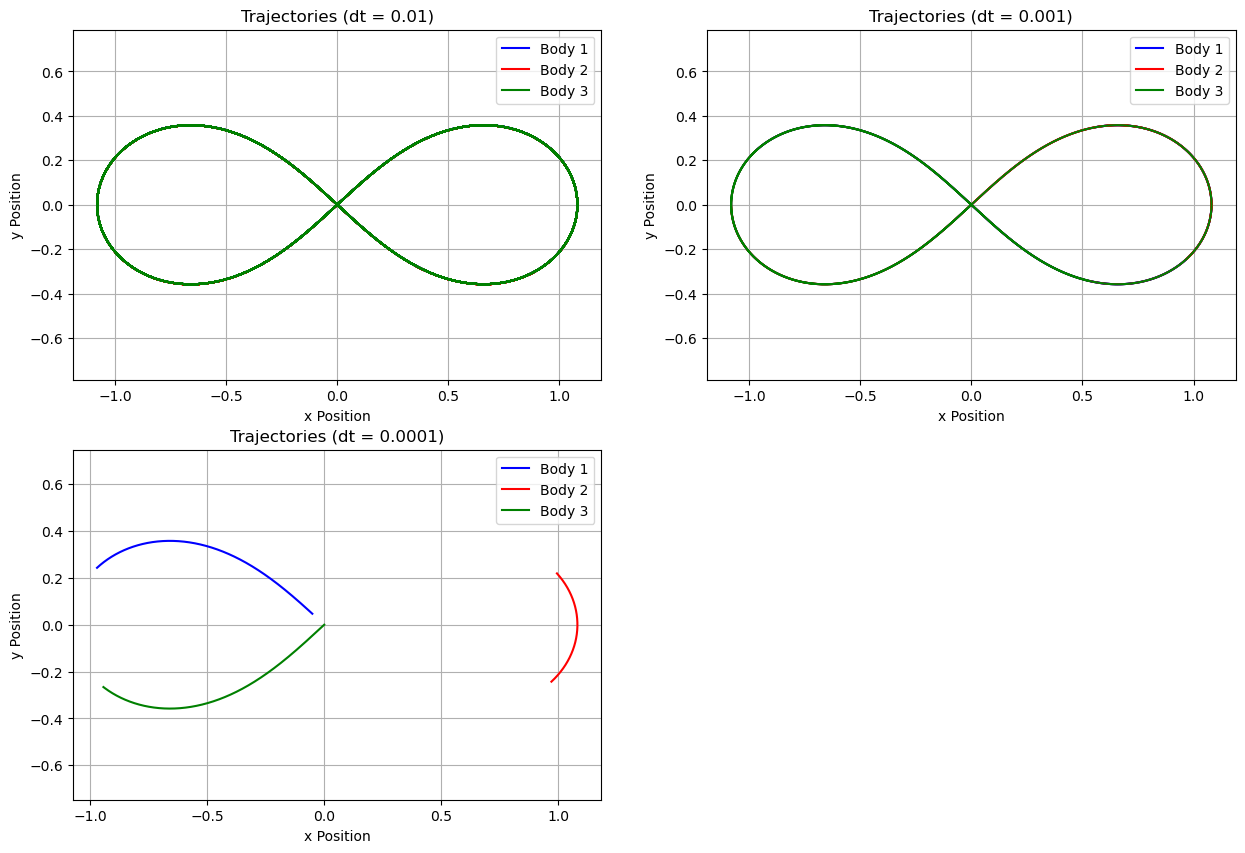

In [39]:
# List of timesteps to test
dt_values = [0.01, 0.001, 0.0001]

# Plotting setup
plt.figure(figsize=(15, 10))

# Loop over different timesteps
for idx, dt in enumerate(dt_values):
    # Arrays to store positions and velocities
    r1_positions = np.zeros((Nsteps, 2))
    r2_positions = np.zeros((Nsteps, 2))
    r3_positions = np.zeros((Nsteps, 2))
    v1_velocities = np.zeros((Nsteps, 2))
    v2_velocities = np.zeros((Nsteps, 2))
    v3_velocities = np.zeros((Nsteps, 2))

    # Store initial conditions
    r1_positions[0] = r1
    r2_positions[0] = r2
    r3_positions[0] = r3
    v1_velocities[0] = v1
    v2_velocities[0] = v2
    v3_velocities[0] = v3

    # Arrays to store energy and angular momentum
    total_energy = np.zeros(Nsteps)
    angular_momentum = np.zeros(Nsteps)

    # Velocity Verlet integration loop
    for i in range(Nsteps - 1):
        # Calculate forces
        F1 = force(r1_positions[i], r2_positions[i], m1, m2) + force(r1_positions[i], r3_positions[i], m1, m3)
        F2 = force(r2_positions[i], r1_positions[i], m2, m1) + force(r2_positions[i], r3_positions[i], m2, m3)
        F3 = force(r3_positions[i], r1_positions[i], m3, m1) + force(r3_positions[i], r2_positions[i], m3, m2)

        # Update positions
        r1_positions[i + 1] = r1_positions[i] + v1_velocities[i] * dt + 0.5 * F1 / m1 * dt**2
        r2_positions[i + 1] = r2_positions[i] + v2_velocities[i] * dt + 0.5 * F2 / m2 * dt**2
        r3_positions[i + 1] = r3_positions[i] + v3_velocities[i] * dt + 0.5 * F3 / m3 * dt**2

        # Calculate forces at new positions
        F1_new = force(r1_positions[i + 1], r2_positions[i + 1], m1, m2) + force(r1_positions[i + 1], r3_positions[i + 1], m1, m3)
        F2_new = force(r2_positions[i + 1], r1_positions[i + 1], m2, m1) + force(r2_positions[i + 1], r3_positions[i + 1], m2, m3)
        F3_new = force(r3_positions[i + 1], r1_positions[i + 1], m3, m1) + force(r3_positions[i + 1], r2_positions[i + 1], m3, m2)

        # Update velocities
        v1_velocities[i + 1] = v1_velocities[i] + 0.5 * (F1 + F1_new) / m1 * dt
        v2_velocities[i + 1] = v2_velocities[i] + 0.5 * (F2 + F2_new) / m2 * dt
        v3_velocities[i + 1] = v3_velocities[i] + 0.5 * (F3 + F3_new) / m3 * dt

        # Calculate total energy and angular momentum
        total_energy[i] = calculate_total_energy(r1_positions[i], r2_positions[i], r3_positions[i], v1_velocities[i], v2_velocities[i], v3_velocities[i], m1, m2, m3, G)
        angular_momentum[i] = calculate_angular_momentum(r1_positions[i], r2_positions[i], r3_positions[i], v1_velocities[i], v2_velocities[i], v3_velocities[i], m1, m2, m3)

    # Final energy and angular momentum
    total_energy[-1] = calculate_total_energy(r1_positions[-1], r2_positions[-1], r3_positions[-1], v1_velocities[-1], v2_velocities[-1], v3_velocities[-1], m1, m2, m3, G)
    angular_momentum[-1] = calculate_angular_momentum(r1_positions[-1], r2_positions[-1], r3_positions[-1], v1_velocities[-1], v2_velocities[-1], v3_velocities[-1], m1, m2, m3)

    # Plot trajectories for each timestep
    plt.subplot(2, 2, idx + 1)
    plt.plot(r1_positions[:, 0], r1_positions[:, 1], label="Body 1", color="blue")
    plt.plot(r2_positions[:, 0], r2_positions[:, 1], label="Body 2", color="red")
    plt.plot(r3_positions[:, 0], r3_positions[:, 1], label="Body 3", color="green")
    plt.title(f"Trajectories (dt = {dt})")
    plt.xlabel("x Position")
    plt.ylabel("y Position")
    plt.legend()
    plt.grid(True)
    plt.axis("equal")

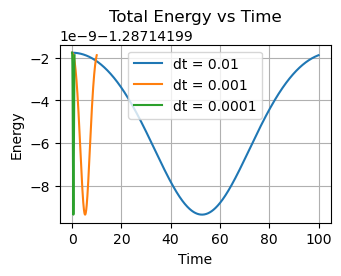

In [40]:
# Plot energy conservation for each timestep
plt.subplot(2, 2, 4)
for idx, dt in enumerate(dt_values):
    plt.plot(np.arange(Nsteps) * dt, total_energy, label=f"dt = {dt}")
plt.title("Total Energy vs Time")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Looking at other mass configurations

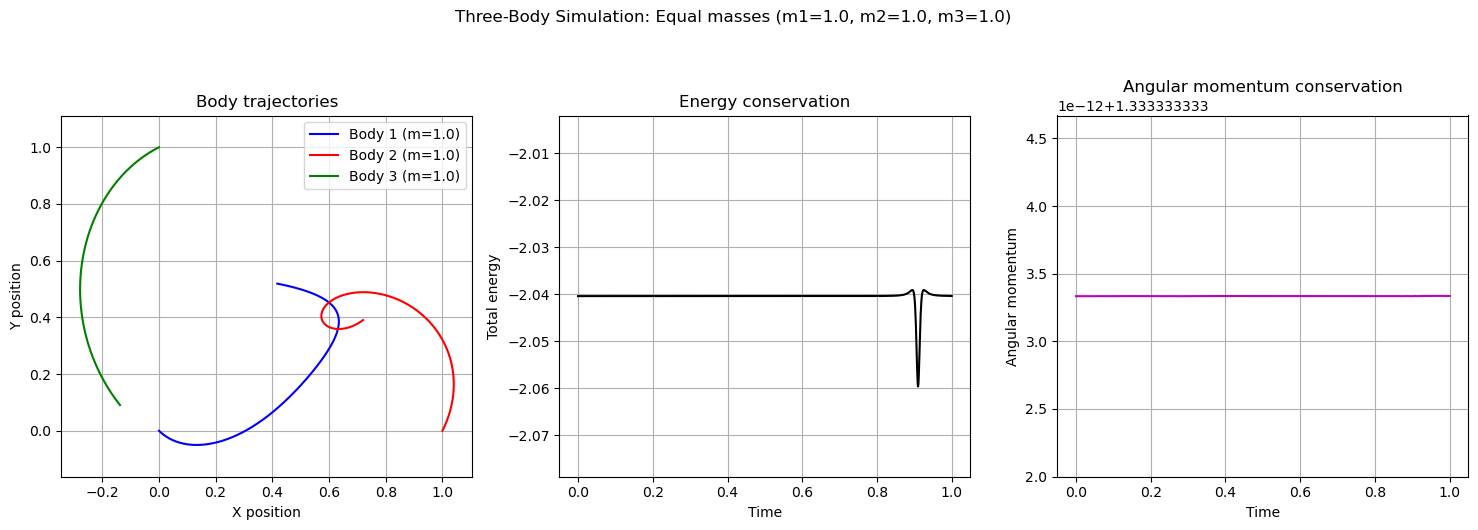

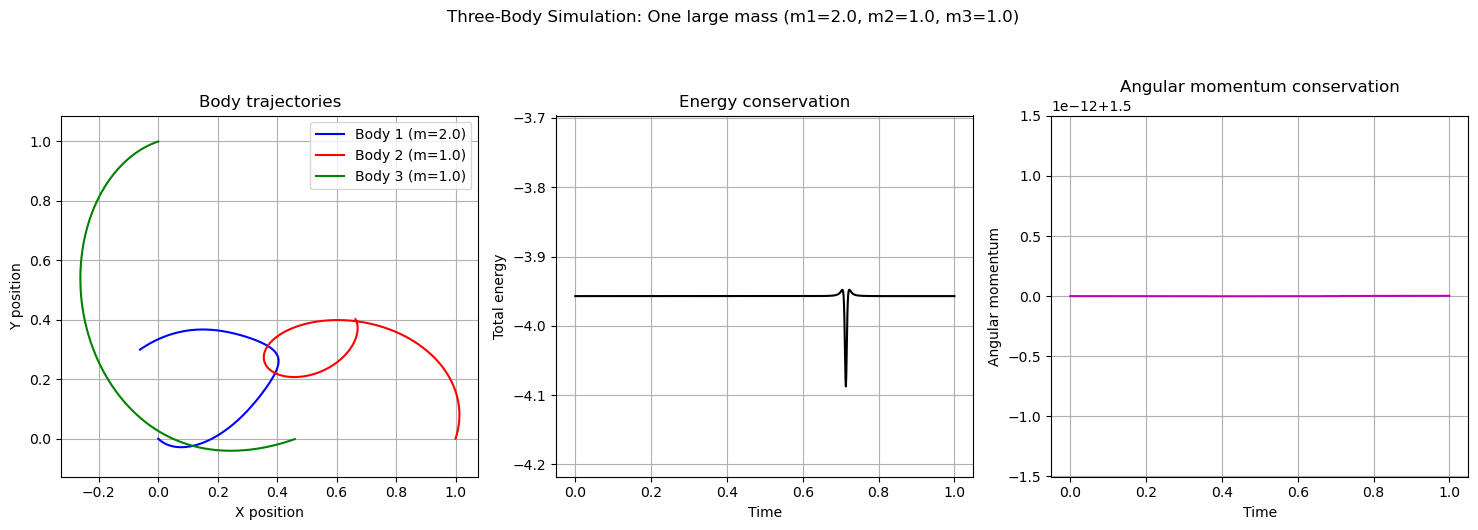

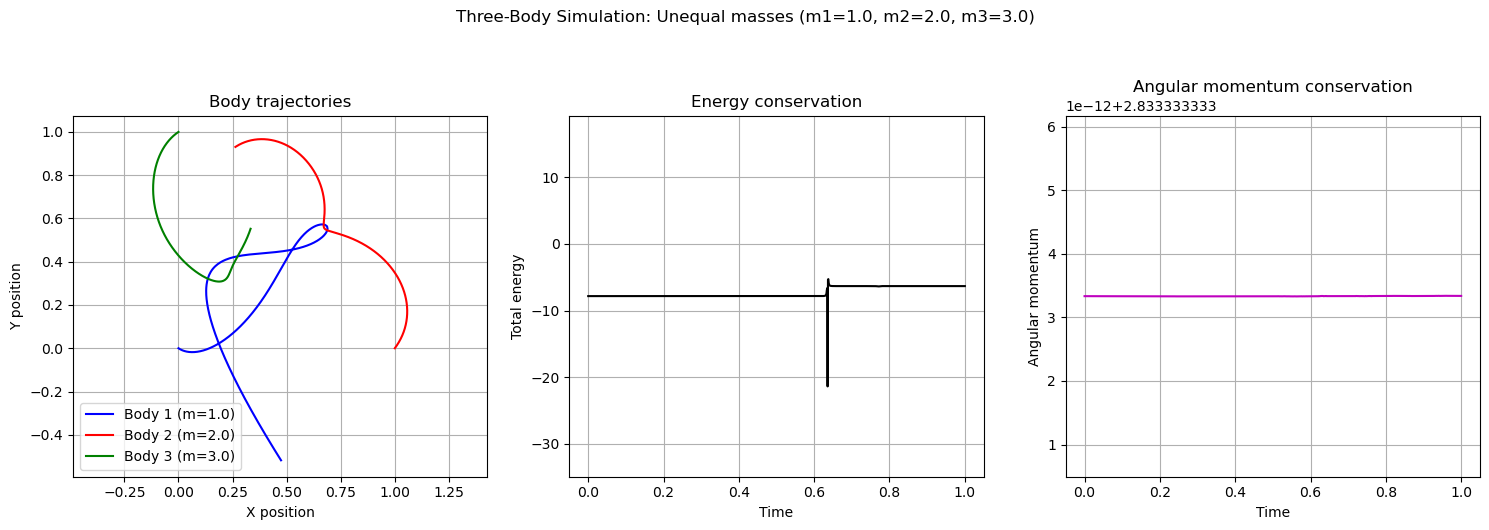

In [43]:
G = 1
dt = 0.001
Nsteps = 1000

mass_configurations = [
    {"m1": 1.0, "m2": 1.0, "m3": 1.0, "label": "Equal masses"},
    {"m1": 2.0, "m2": 1.0, "m3": 1.0, "label": "One large mass"},
    {"m1": 1.0, "m2": 2.0, "m3": 3.0, "label": "Unequal masses"}
]

initial_conditions = {
    "r1": np.array([0.0, 0.0]),
    "r2": np.array([1.0, 0.0]),
    "r3": np.array([0.0, 1.0]),
    "v1": np.array([0.0, 0.0]),
    "v2": np.array([0.0, 1.0]),
    "v3": np.array([-1.0, 0.0])
}

for config in mass_configurations:
    # Initialise system 
    m1, m2, m3 = config["m1"], config["m2"], config["m3"]
    r1, r2, r3 = initial_conditions["r1"].copy(), initial_conditions["r2"].copy(), initial_conditions["r3"].copy()
    v1, v2, v3 = initial_conditions["v1"].copy(), initial_conditions["v2"].copy(), initial_conditions["v3"].copy()
    
    # Adjust for zero momentum
    total_momentum = m1*v1 + m2*v2 + m3*v3
    v1 -= total_momentum/(m1 + m2 + m3)
    v2 -= total_momentum/(m1 + m2 + m3)
    v3 -= total_momentum/(m1 + m2 + m3)
    
    # Storage arrays
    r1_history = np.zeros((Nsteps, 2))
    r2_history = np.zeros((Nsteps, 2))
    r3_history = np.zeros((Nsteps, 2))
    energy_history = np.zeros(Nsteps)
    ang_mom_history = np.zeros(Nsteps)
    
    # Store initial state
    r1_history[0], r2_history[0], r3_history[0] = r1, r2, r3
    energy_history[0] = calculate_total_energy(r1, r2, r3, v1, v2, v3, m1, m2, m3, G)
    ang_mom_history[0] = calculate_angular_momentum(r1, r2, r3, v1, v2, v3, m1, m2, m3)
    
    for i in range(1, Nsteps):
        # Current forces
        F1 = force(r1, r2, m1, m2) + force(r1, r3, m1, m3)
        F2 = force(r2, r1, m2, m1) + force(r2, r3, m2, m3)
        F3 = force(r3, r1, m3, m1) + force(r3, r2, m3, m2)
        
        # Update positions
        r1 += v1*dt + 0.5*F1/m1*dt**2
        r2 += v2*dt + 0.5*F2/m2*dt**2
        r3 += v3*dt + 0.5*F3/m3*dt**2
        
        # New forces
        F1_new = force(r1, r2, m1, m2) + force(r1, r3, m1, m3)
        F2_new = force(r2, r1, m2, m1) + force(r2, r3, m2, m3)
        F3_new = force(r3, r1, m3, m1) + force(r3, r2, m3, m2)
        
        # Update velocities
        v1 += 0.5*(F1 + F1_new)/m1 * dt
        v2 += 0.5*(F2 + F2_new)/m2 * dt
        v3 += 0.5*(F3 + F3_new)/m3 * dt
        
        # Store state
        r1_history[i], r2_history[i], r3_history[i] = r1, r2, r3
        energy_history[i] = calculate_total_energy(r1, r2, r3, v1, v2, v3, m1, m2, m3, G)
        ang_mom_history[i] = calculate_angular_momentum(r1, r2, r3, v1, v2, v3, m1, m2, m3)
   
     # Plotting
    plt.figure(figsize=(15, 5))
    plt.suptitle(f"Three-Body Simulation: {config['label']} (m1={m1}, m2={m2}, m3={m3})", y=1.05)
        
    # Trajectories plot
    plt.subplot(1, 3, 1)
    plt.plot(r1_history[:, 0], r1_history[:, 1], 'b-', label=f"Body 1 (m={m1})")
    plt.plot(r2_history[:, 0], r2_history[:, 1], 'r-', label=f"Body 2 (m={m2})")
    plt.plot(r3_history[:, 0], r3_history[:, 1], 'g-', label=f"Body 3 (m={m3})")
    plt.xlabel("X position")
    plt.ylabel("Y position")
    plt.title("Body trajectories")
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
        
    # Energy plot (zoomed out)
    plt.subplot(1, 3, 2)
    initial_energy = energy_history[0]
    energy_range = max(abs(energy_history - initial_energy)) * 2  # Get max deviation and double it
    if energy_range == 0:  # Handle case where energy is perfectly conserved
        energy_range = abs(initial_energy) * 0.01  # Small percentage of initial energy
    plt.ylim(initial_energy - energy_range, initial_energy + energy_range)  # Center around initial energy
    plt.plot(np.linspace(0, Nsteps*dt, Nsteps), energy_history, 'k-')
    plt.xlabel("Time")
    plt.ylabel("Total energy")
    plt.title("Energy conservation")
    plt.grid(True)
        
    # Angular momentum plot
    plt.subplot(1, 3, 3)
    plt.plot(np.linspace(0, Nsteps*dt, Nsteps), ang_mom_history, 'm-')
    plt.xlabel("Time")
    plt.ylabel("Angular momentum")
    plt.title("Angular momentum conservation")
    plt.grid(True)
        
    plt.tight_layout()
    plt.show()
    